## check GPU

In [ ]:
!nvidia-smi

Sat Dec 21 19:56:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# import ULtralytics library

In [ ]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


## import YOLO from ultralytics
YOLO (You Only Look Once) is a real-time object detection algorithm. It can detect and classify multiple objects in an image with a single forward pass through a neural network — hence the name "You Only Look Once

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

# 🤖 What is Roboflow
Roboflow is an end-to-end tool that helps you go from raw images to a trained computer vision model — all in one place. It’s designed to make image labeling, dataset management, augmentation, training, and deployment really simple.


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="vhRwYqEvUnzqPY2tP4oJ")
project = rf.workspace("projekt").project("tablice-73he1")
version = project.version(5)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Tablice-5 in yolov11:: 100%|██████████| 17378/17378 [00:03<00:00, 4866.33it/s]


# Train the model

In [ ]:
model=YOLO('yolo11n.pt') #model which we using
train_ds=model.train(data='/content/Tablice-5/data.yaml',# path of data_file
                     epochs=20,# how many time train
                     imgsz=640, # image size
                     device=0)# device to run on and also u can run decice in upu

100%|██████████| 5.35M/5.35M [00:00<00:00, 307MB/s]


Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Tablice-5/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

100%|██████████| 755k/755k [00:00<00:00, 85.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Tablice-5/train/labels... 6083 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6083/6083 [00:03<00:00, 1701.39it/s]


train: New cache created: /content/Tablice-5/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3770, len(boxes) = 8632. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Tablice-5/valid/labels... 1733 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1733/1733 [00:01<00:00, 911.74it/s] 


val: New cache created: /content/Tablice-5/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1053, len(boxes) = 2396. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.58G      1.231      1.684      1.491          9        640: 100%|██████████| 381/381 [02:16<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:18<00:00,  3.02it/s]


                   all       1733       2396      0.589      0.487      0.553      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.45G      1.293      1.228      1.543          5        640: 100%|██████████| 381/381 [02:11<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:16<00:00,  3.25it/s]


                   all       1733       2396      0.773      0.684        0.7      0.428

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.42G      1.288       1.14      1.528         11        640: 100%|██████████| 381/381 [02:11<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:16<00:00,  3.27it/s]


                   all       1733       2396       0.82      0.701       0.74      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.39G      1.237      1.041      1.492          6        640: 100%|██████████| 381/381 [02:07<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:16<00:00,  3.24it/s]


                   all       1733       2396      0.857      0.745      0.782      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.41G      1.199     0.9975      1.454         12        640: 100%|██████████| 381/381 [02:11<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:18<00:00,  2.92it/s]


                   all       1733       2396      0.863      0.747      0.785      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.41G      1.159     0.9383      1.423          7        640: 100%|██████████| 381/381 [02:08<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:16<00:00,  3.30it/s]


                   all       1733       2396      0.839      0.739      0.775       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.45G      1.145     0.9101      1.421         10        640: 100%|██████████| 381/381 [02:11<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:16<00:00,  3.33it/s]

                   all       1733       2396      0.877      0.743      0.798      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.39G      1.123     0.8909        1.4          3        640: 100%|██████████| 381/381 [02:09<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:16<00:00,  3.34it/s]

                   all       1733       2396      0.886      0.754      0.813      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.38G      1.095     0.8465      1.379          9        640: 100%|██████████| 381/381 [02:10<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:16<00:00,  3.32it/s]

                   all       1733       2396      0.864      0.772      0.817      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.39G       1.07     0.8276      1.368          8        640: 100%|██████████| 381/381 [02:07<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:16<00:00,  3.29it/s]

                   all       1733       2396      0.893      0.764      0.826      0.588


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.44G       1.05     0.7669       1.41          3        640: 100%|██████████| 381/381 [02:06<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:16<00:00,  3.34it/s]

                   all       1733       2396      0.873      0.788      0.828      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.37G      1.022     0.7273      1.377          5        640: 100%|██████████| 381/381 [02:04<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:16<00:00,  3.37it/s]

                   all       1733       2396      0.875      0.775      0.826      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.38G      1.007     0.7056       1.37          3        640: 100%|██████████| 381/381 [02:00<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:16<00:00,  3.28it/s]

                   all       1733       2396      0.873      0.795      0.836      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.37G     0.9816     0.6796      1.345          3        640: 100%|██████████| 381/381 [02:01<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:16<00:00,  3.31it/s]

                   all       1733       2396      0.874      0.787      0.842      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.37G      0.963      0.662      1.331          3        640: 100%|██████████| 381/381 [02:00<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:16<00:00,  3.40it/s]

                   all       1733       2396      0.888       0.79      0.851      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.37G     0.9424     0.6456      1.318          5        640: 100%|██████████| 381/381 [01:58<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.50it/s]


                   all       1733       2396      0.885      0.789      0.848      0.625

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.36G     0.9285     0.6246      1.305          3        640: 100%|██████████| 381/381 [01:58<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.45it/s]

                   all       1733       2396      0.892      0.795      0.853      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.37G     0.9105     0.6095      1.293          5        640: 100%|██████████| 381/381 [02:00<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:15<00:00,  3.47it/s]

                   all       1733       2396      0.912      0.777      0.854      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.37G     0.8899     0.5947      1.274          5        640: 100%|██████████| 381/381 [01:58<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:16<00:00,  3.37it/s]


                   all       1733       2396      0.925      0.773      0.857      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.41G      0.874      0.579      1.257          3        640: 100%|██████████| 381/381 [02:09<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:16<00:00,  3.33it/s]

                   all       1733       2396      0.923      0.778      0.861      0.646



20 epochs completed in 0.802 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 55/55 [00:19<00:00,  2.87it/s]


                   all       1733       2396      0.926      0.777      0.861      0.646
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train


# ✅ Conclusion:
 model is learning effectively and has reached a solid performance level. With a final mAP@0.5:0.95 of 0.639, it's performing well across IoU thresholds — a great result, especially if you're doing object detection for a real-world application

# confusion matrics which is analysis actual and predicted values

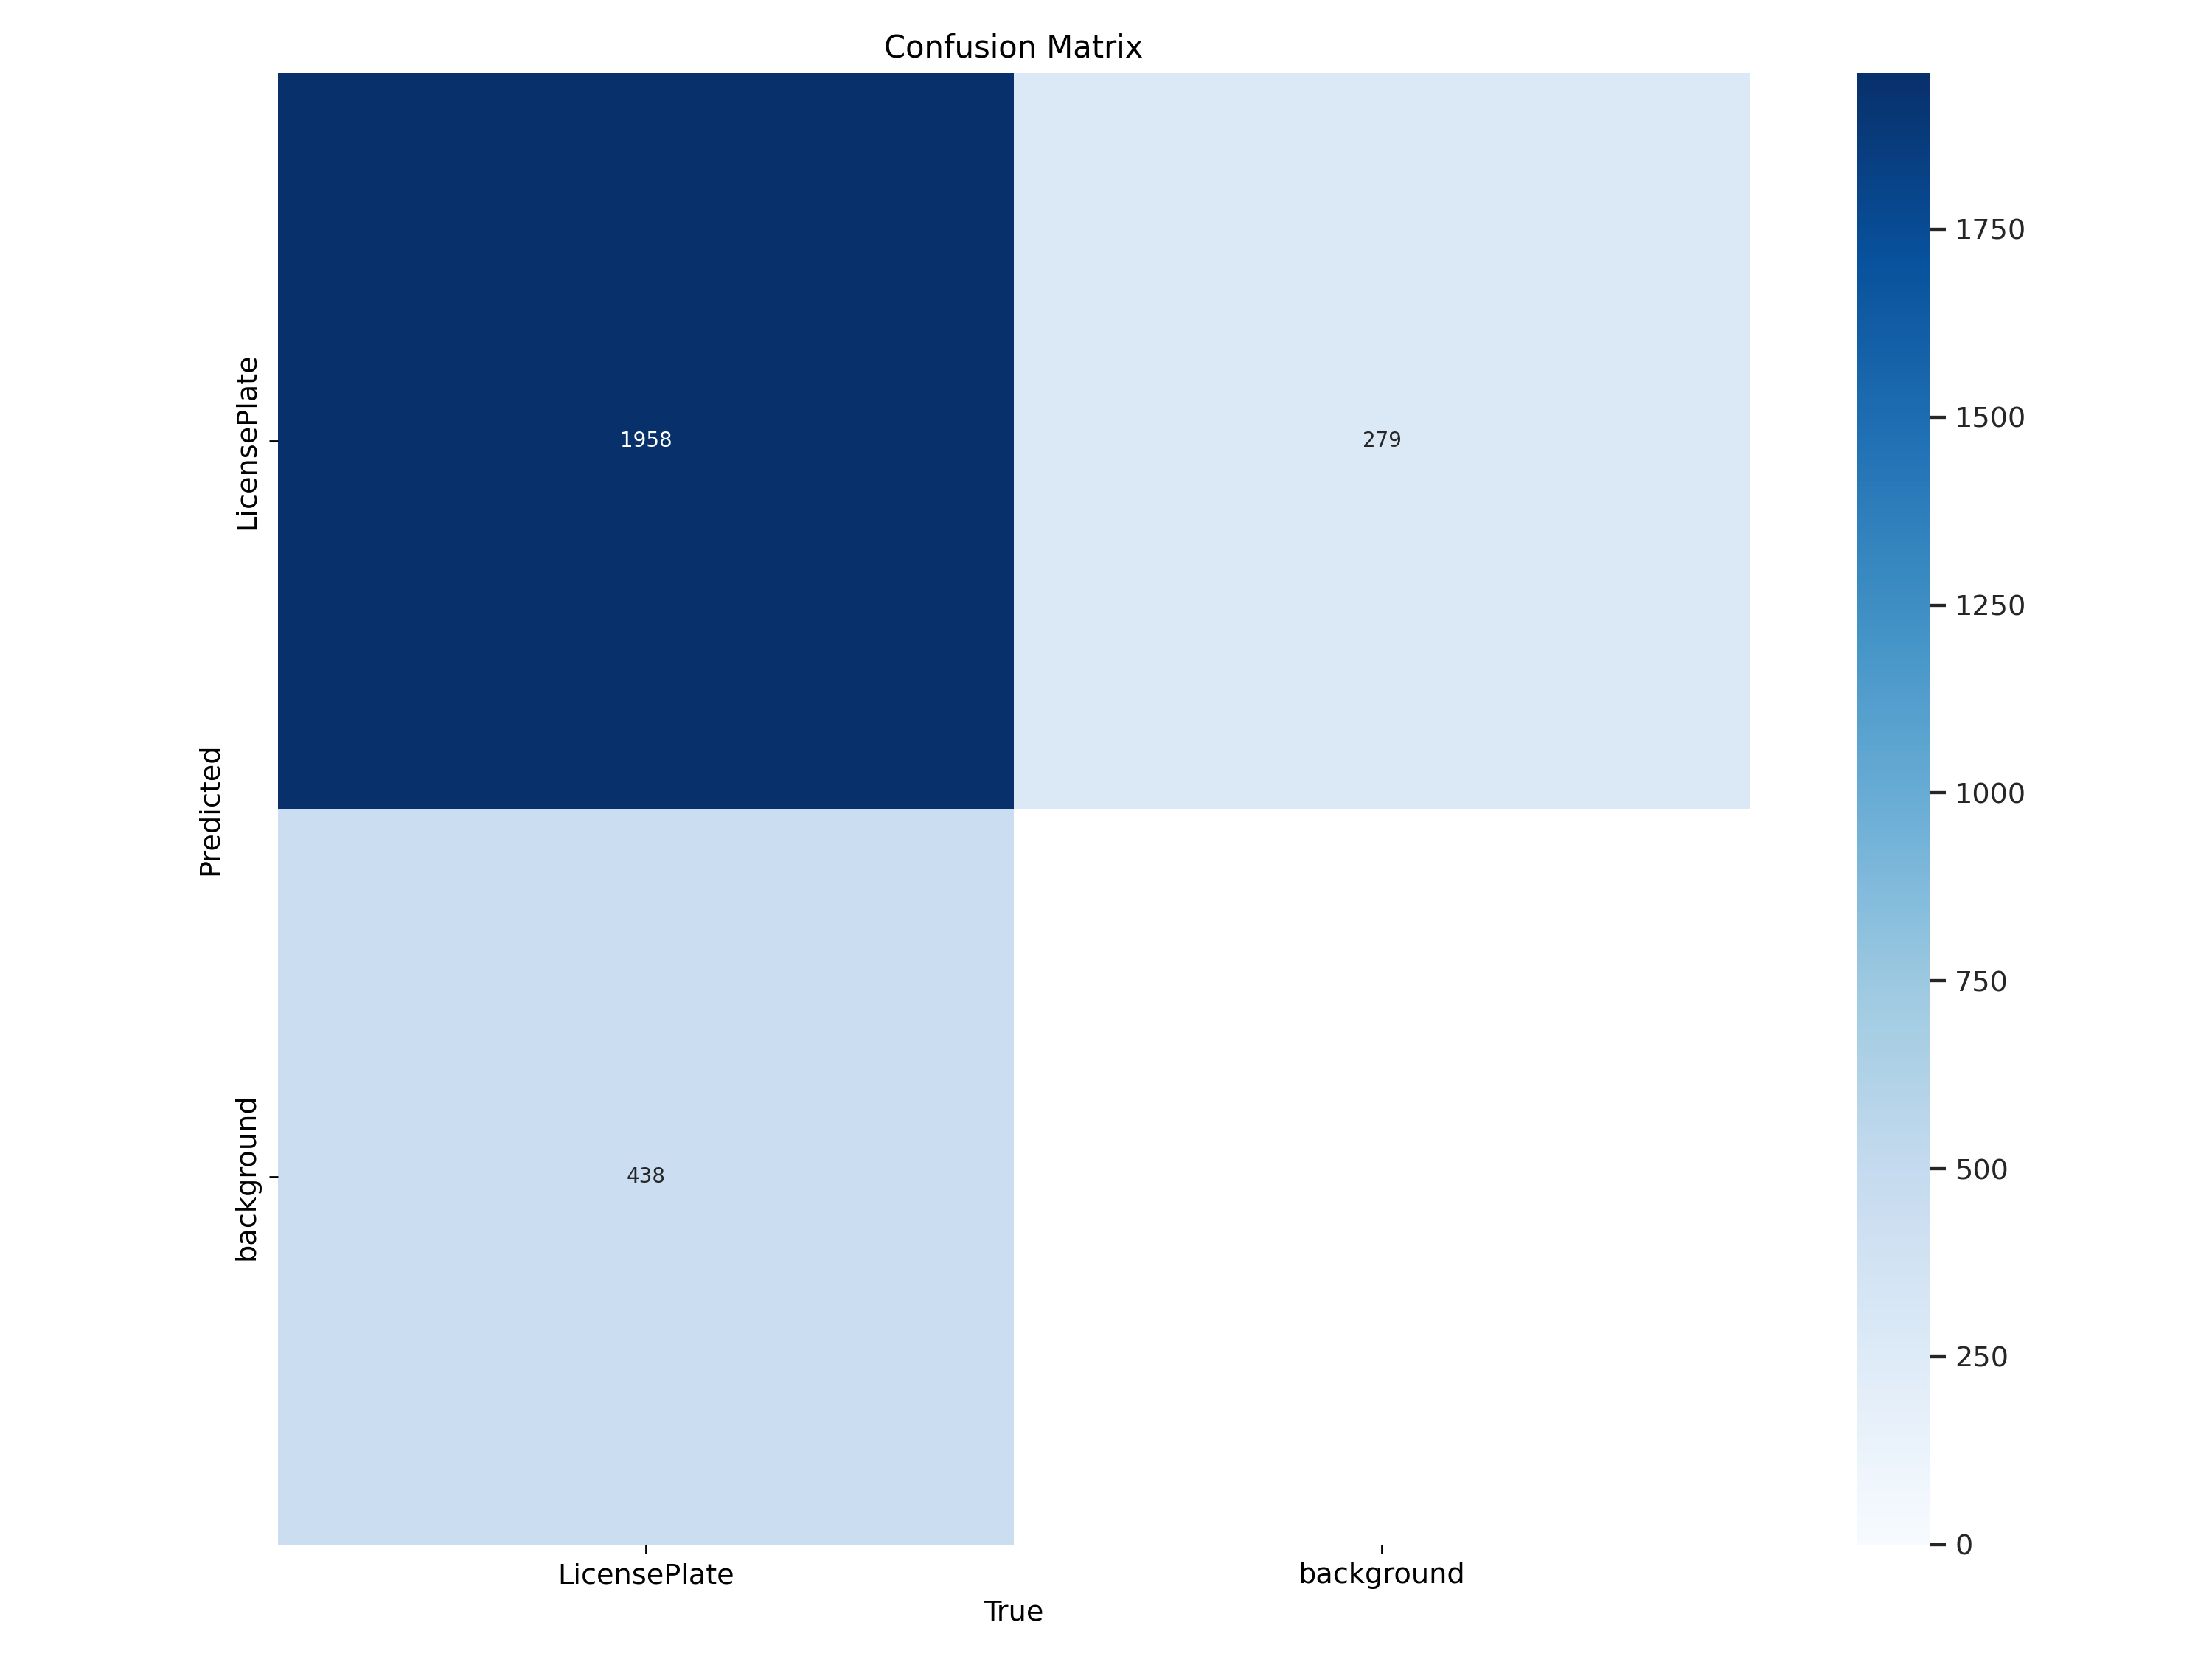

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png',width=600
      )

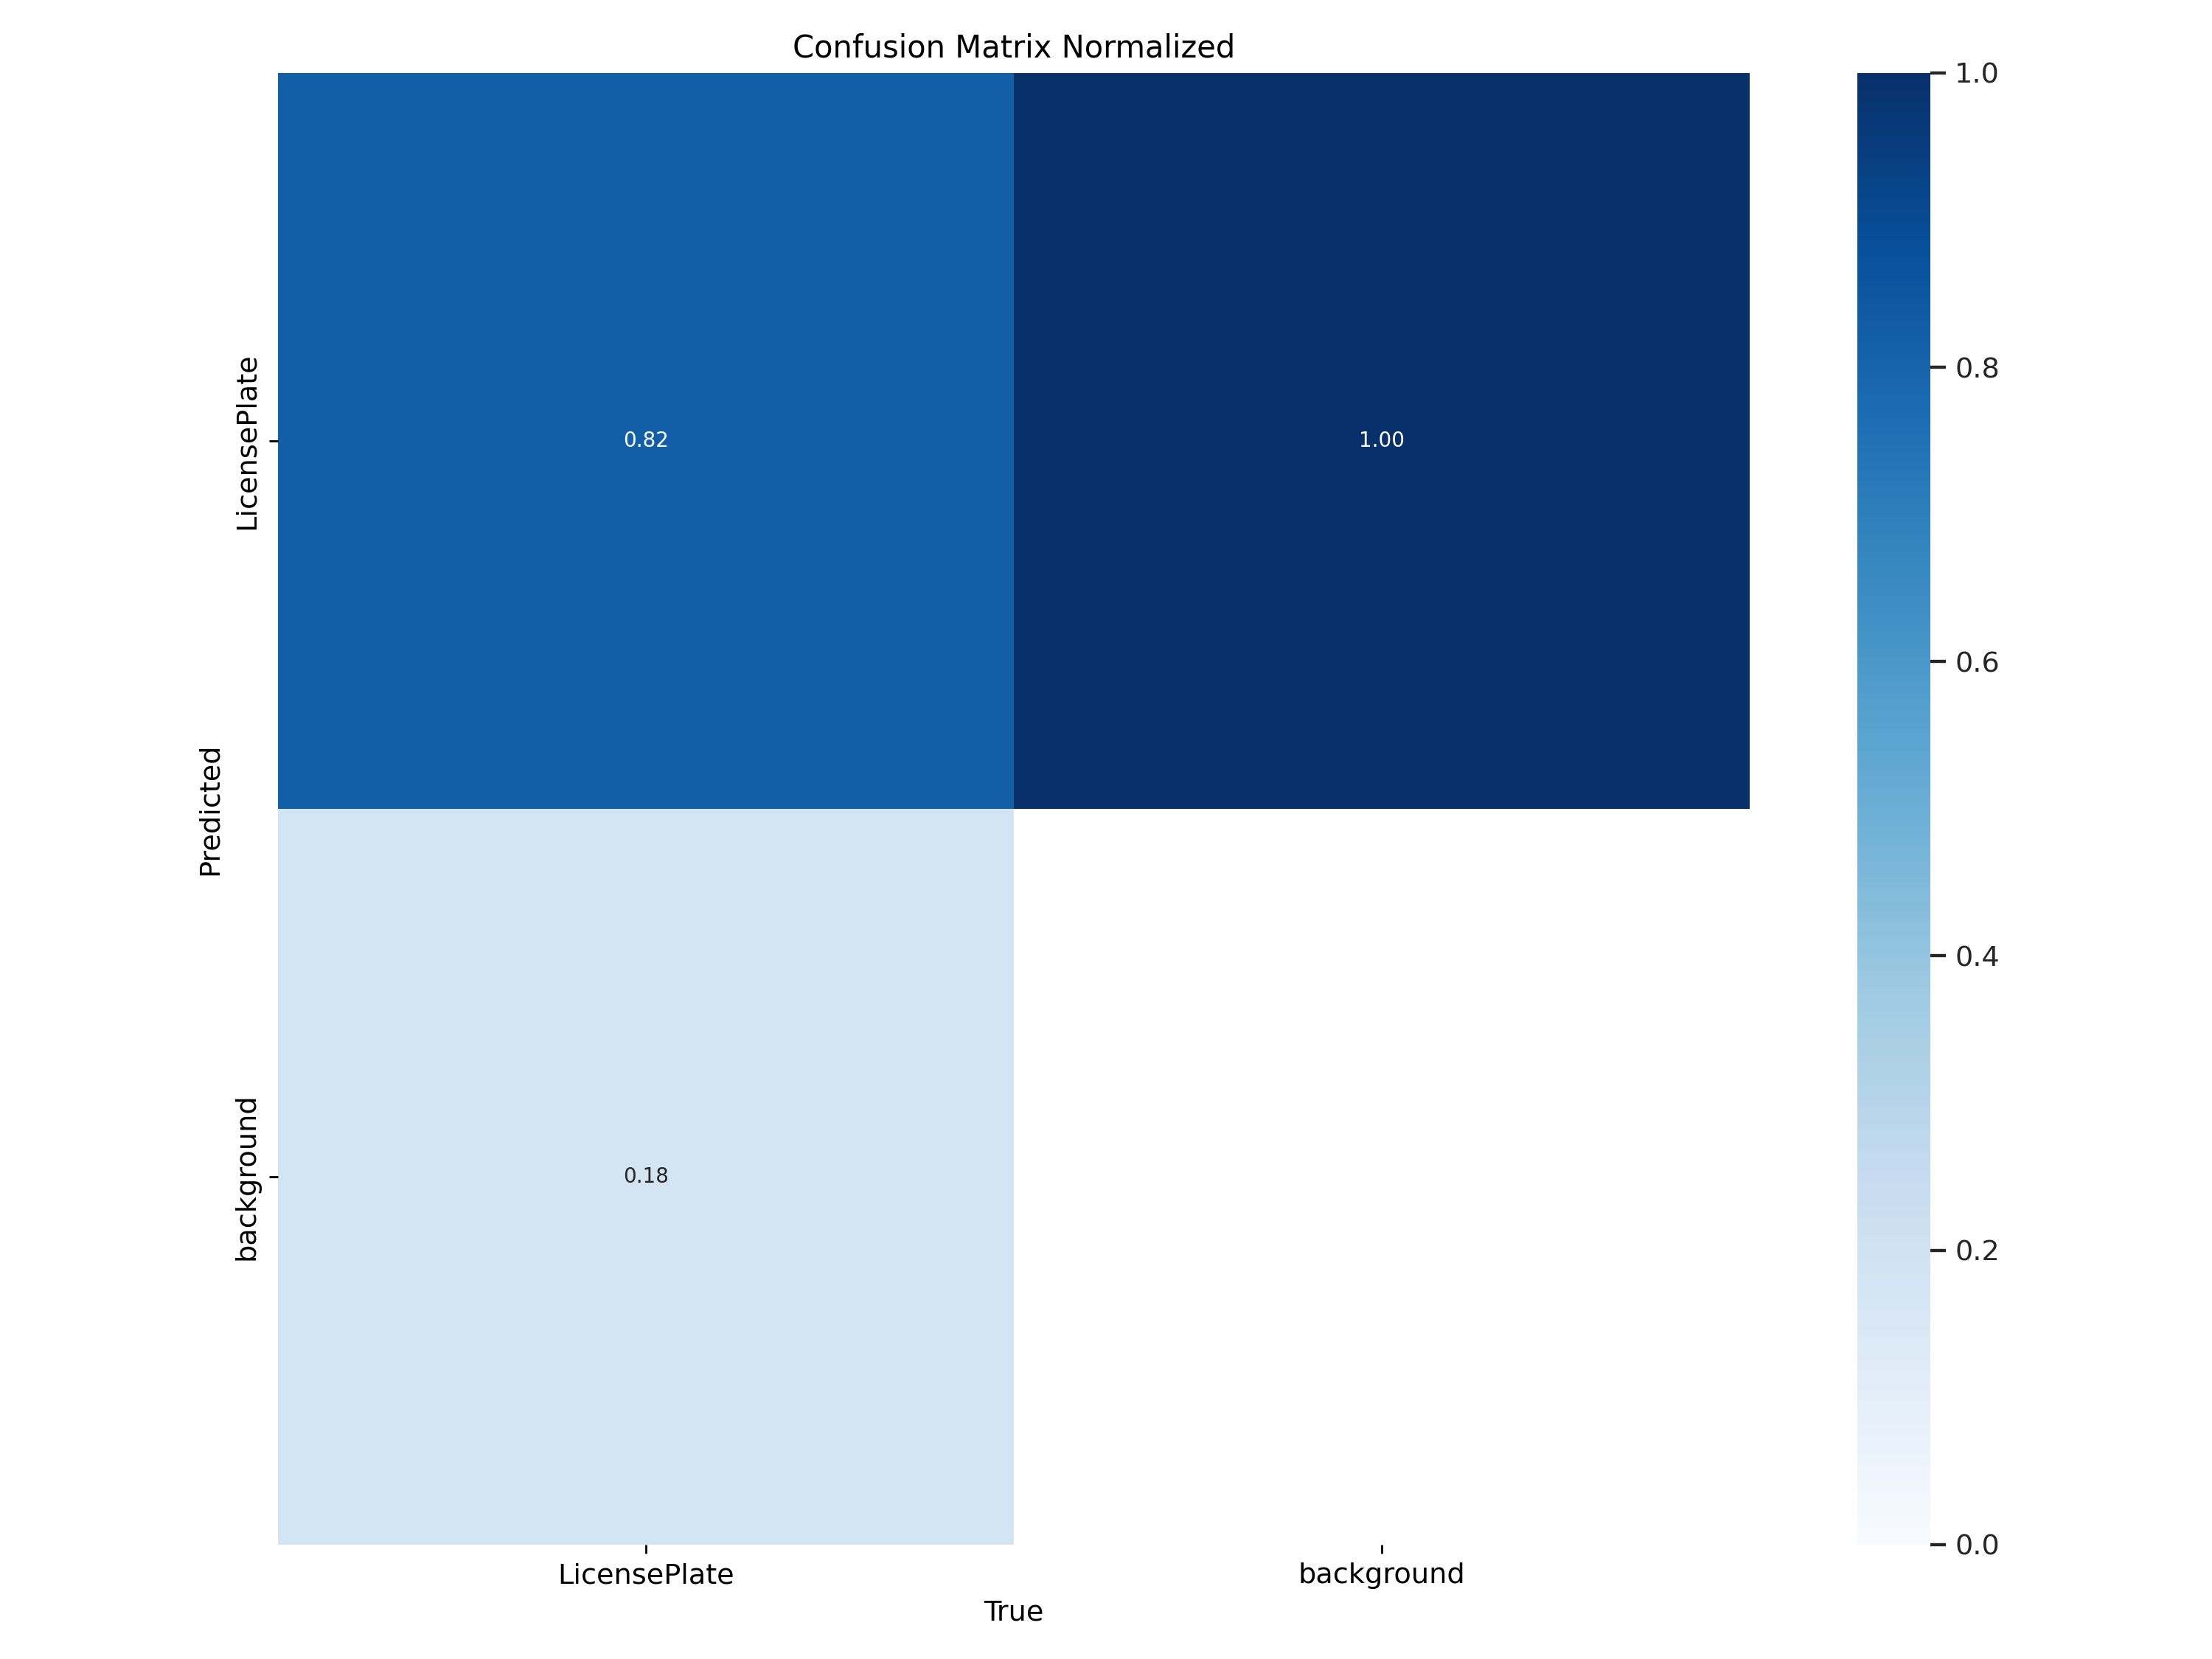

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix_normalized.png',width=600)

# Training and validation result

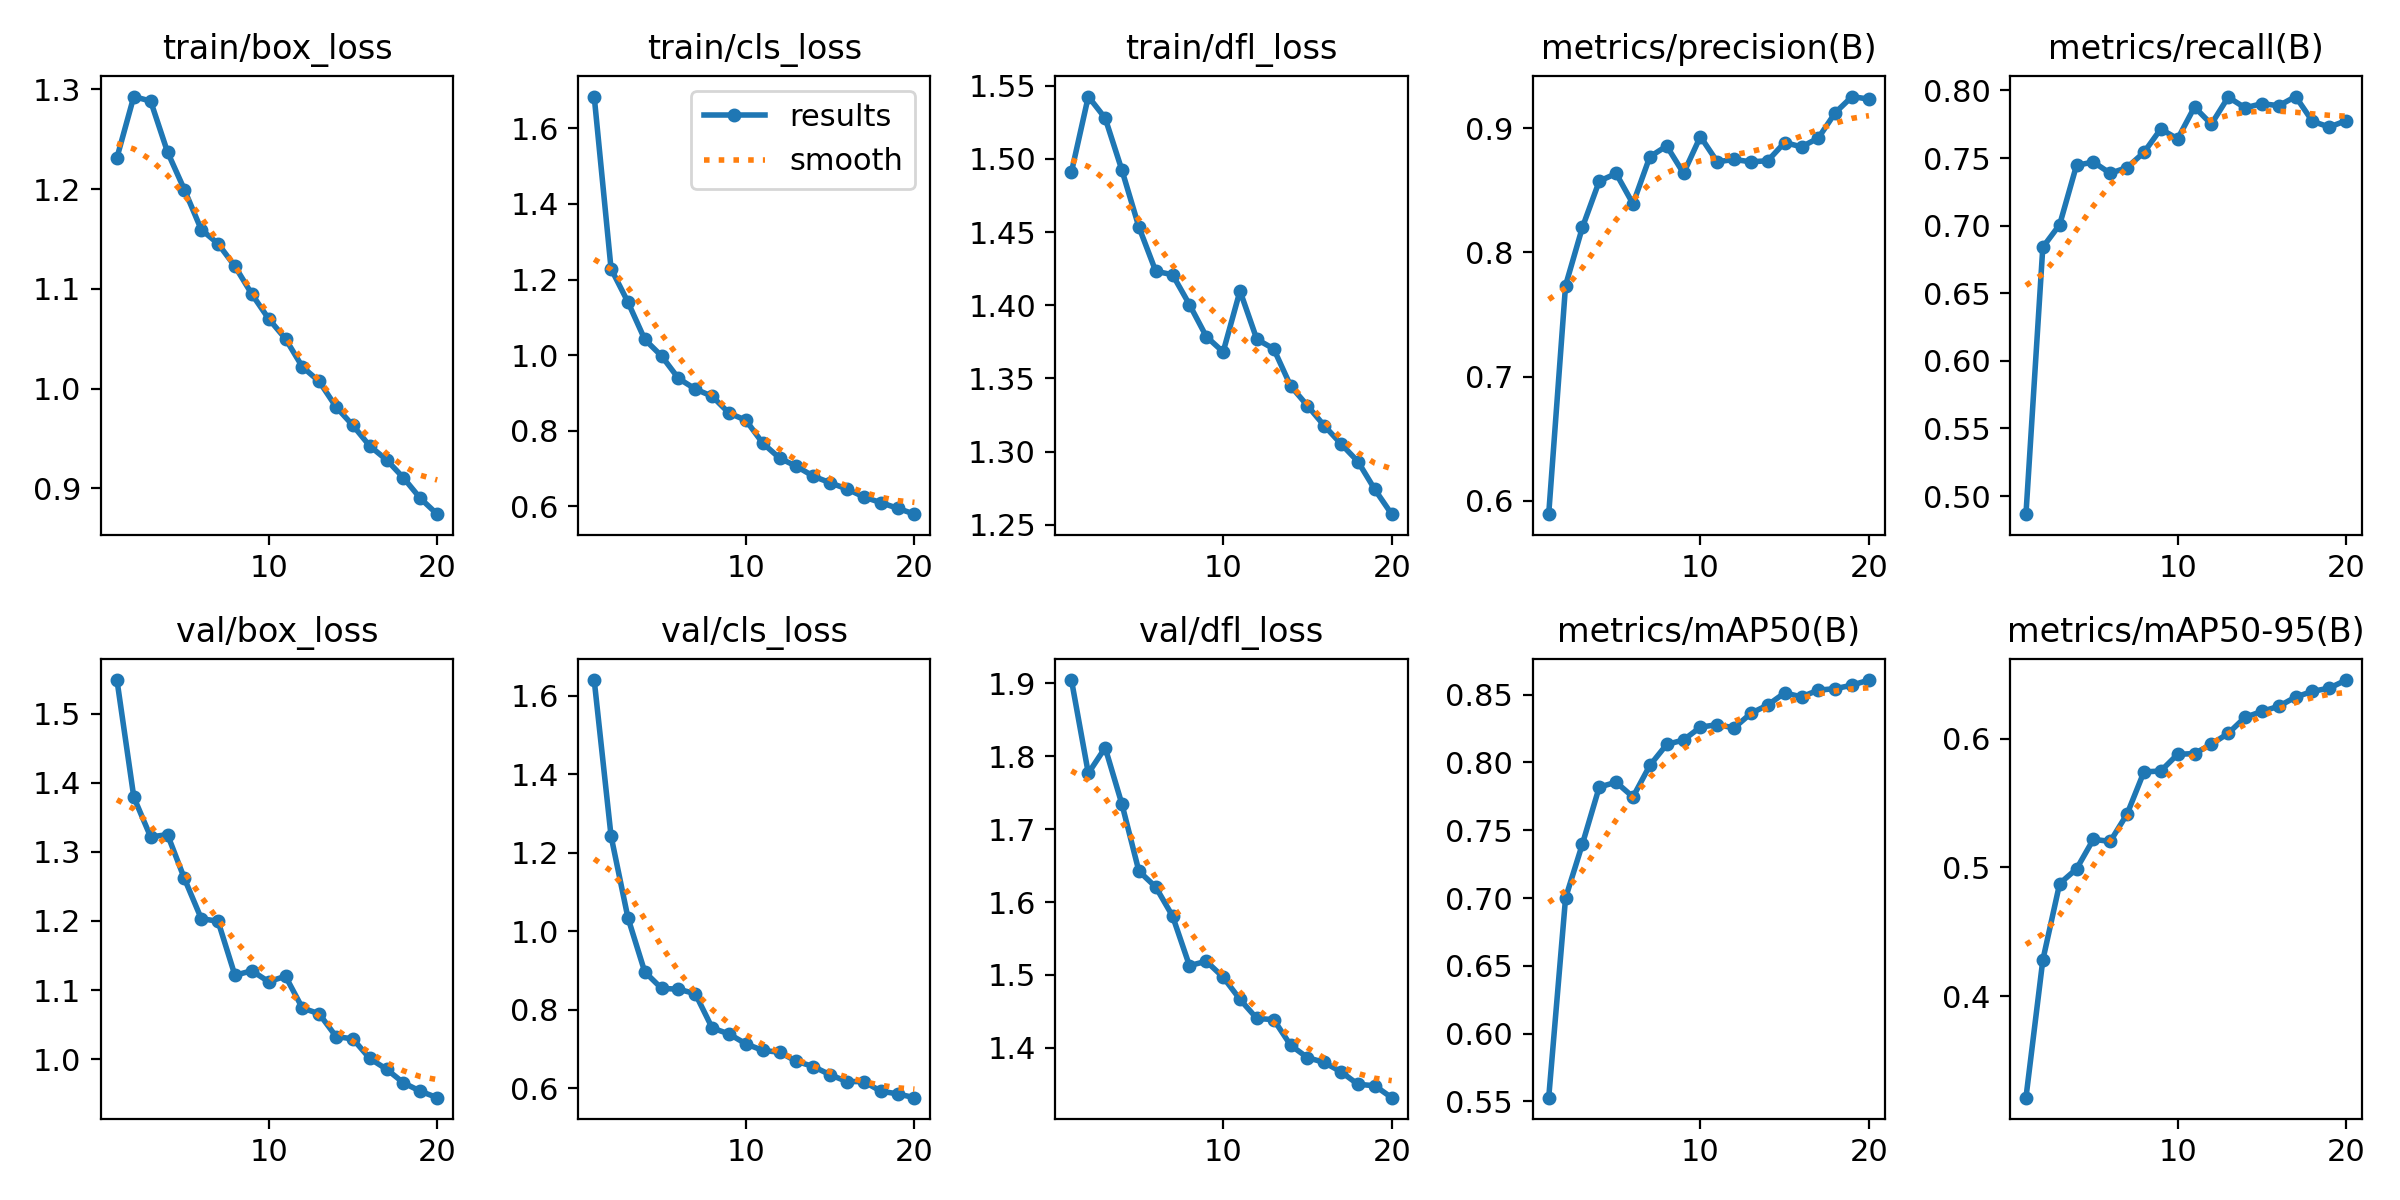

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png',width=600)

In [ ]:
import pandas as pd
df=pd.read_csv('/content/runs/detect/train/results.csv')
display(df)

epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0       1   160.906         1.23149         1.68426         1.49102   
1       2   311.136         1.29278         1.22842         1.54261   
2       3   460.818         1.28820         1.14047         1.52787   
3       4   606.543         1.23717         1.04138         1.49211   
4       5   758.384         1.19946         0.99747         1.45350   
5       6   904.904         1.15945         0.93830         1.42325   
6       7  1054.090         1.14520         0.91013         1.42082   
7       8  1200.810         1.12260         0.89095         1.40048   
8       9  1348.690         1.09478         0.84649         1.37862   
9      10  1494.040         1.06997         0.82762         1.36807   
10     11  1638.240         1.04989         0.76686         1.40979   
11     12  1779.930         1.02178         0.72732         1.37669   
12     13  1918.650         1.00711         0.70561         1.37020   
13     14  2057.300         0.98158         0.67956         1.34491   
14     15  2194.790         0.96301         0.66197         1.33135   
15     16  2330.610         0.94239         0.64561         1.31765   
16     17  2466.330         0.92850         0.62460         1.30518   
17     18  2603.220         0.91046         0.60954         1.29313   
18     19  2739.490         0.88993         0.59471         1.27407   
19     20  2886.460         0.87404         0.57898         1.25720   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0                0.58937            0.48664           0.55279   
1                0.77328            0.68406           0.70007   
2                0.82012            0.70075           0.73989   
3                0.85728            0.74460           0.78189   
4                0.86341            0.74708           0.78545   
5                0.83904            0.73873           0.77457   
6                0.87686            0.74301           0.79783   
7                0.88557            0.75417           0.81327   
8                0.86359            0.77151           0.81662   
9                0.89315            0.76419           0.82606   
10               0.87283            0.78774           0.82793   
11               0.87472            0.77504           0.82550   
12               0.87278            0.79508           0.83626   
13               0.87368            0.78715           0.84242   
14               0.88834            0.79023           0.85131   
15               0.88482            0.78873           0.84839   
16               0.89199            0.79549           0.85340   
17               0.91230            0.77715           0.85442   
18               0.92531            0.77295           0.85704   
19               0.92320            0.77767           0.86080   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0               0.32108       1.54849       1.64051       1.90450  0.000665   
1               0.42794       1.37910       1.24270       1.77663  0.001266   
2               0.48741       1.32151       1.03470       1.81167  0.001800   
3               0.49879       1.32493       0.89655       1.73382  0.001703   
4               0.52177       1.26147       0.85440       1.64245  0.001604   
5               0.52017       1.20349       0.85252       1.62058  0.001505   
6               0.54144       1.19942       0.84077       1.58069  0.001406   
7               0.57414       1.12138       0.75357       1.51276  0.001307   
8               0.57488       1.12800       0.73825       1.51875  0.001208   
9               0.58785       1.11216       0.71314       1.49695  0.001109   
10              0.58840       1.12002       0.69627       1.46646  0.001010   
11              0.59568       1.07409       0.69179       1.44024  0.000911   
12              0.60411       1.06567       0.66858       1.43875  0.000812   
13              0.61657       1.03284   

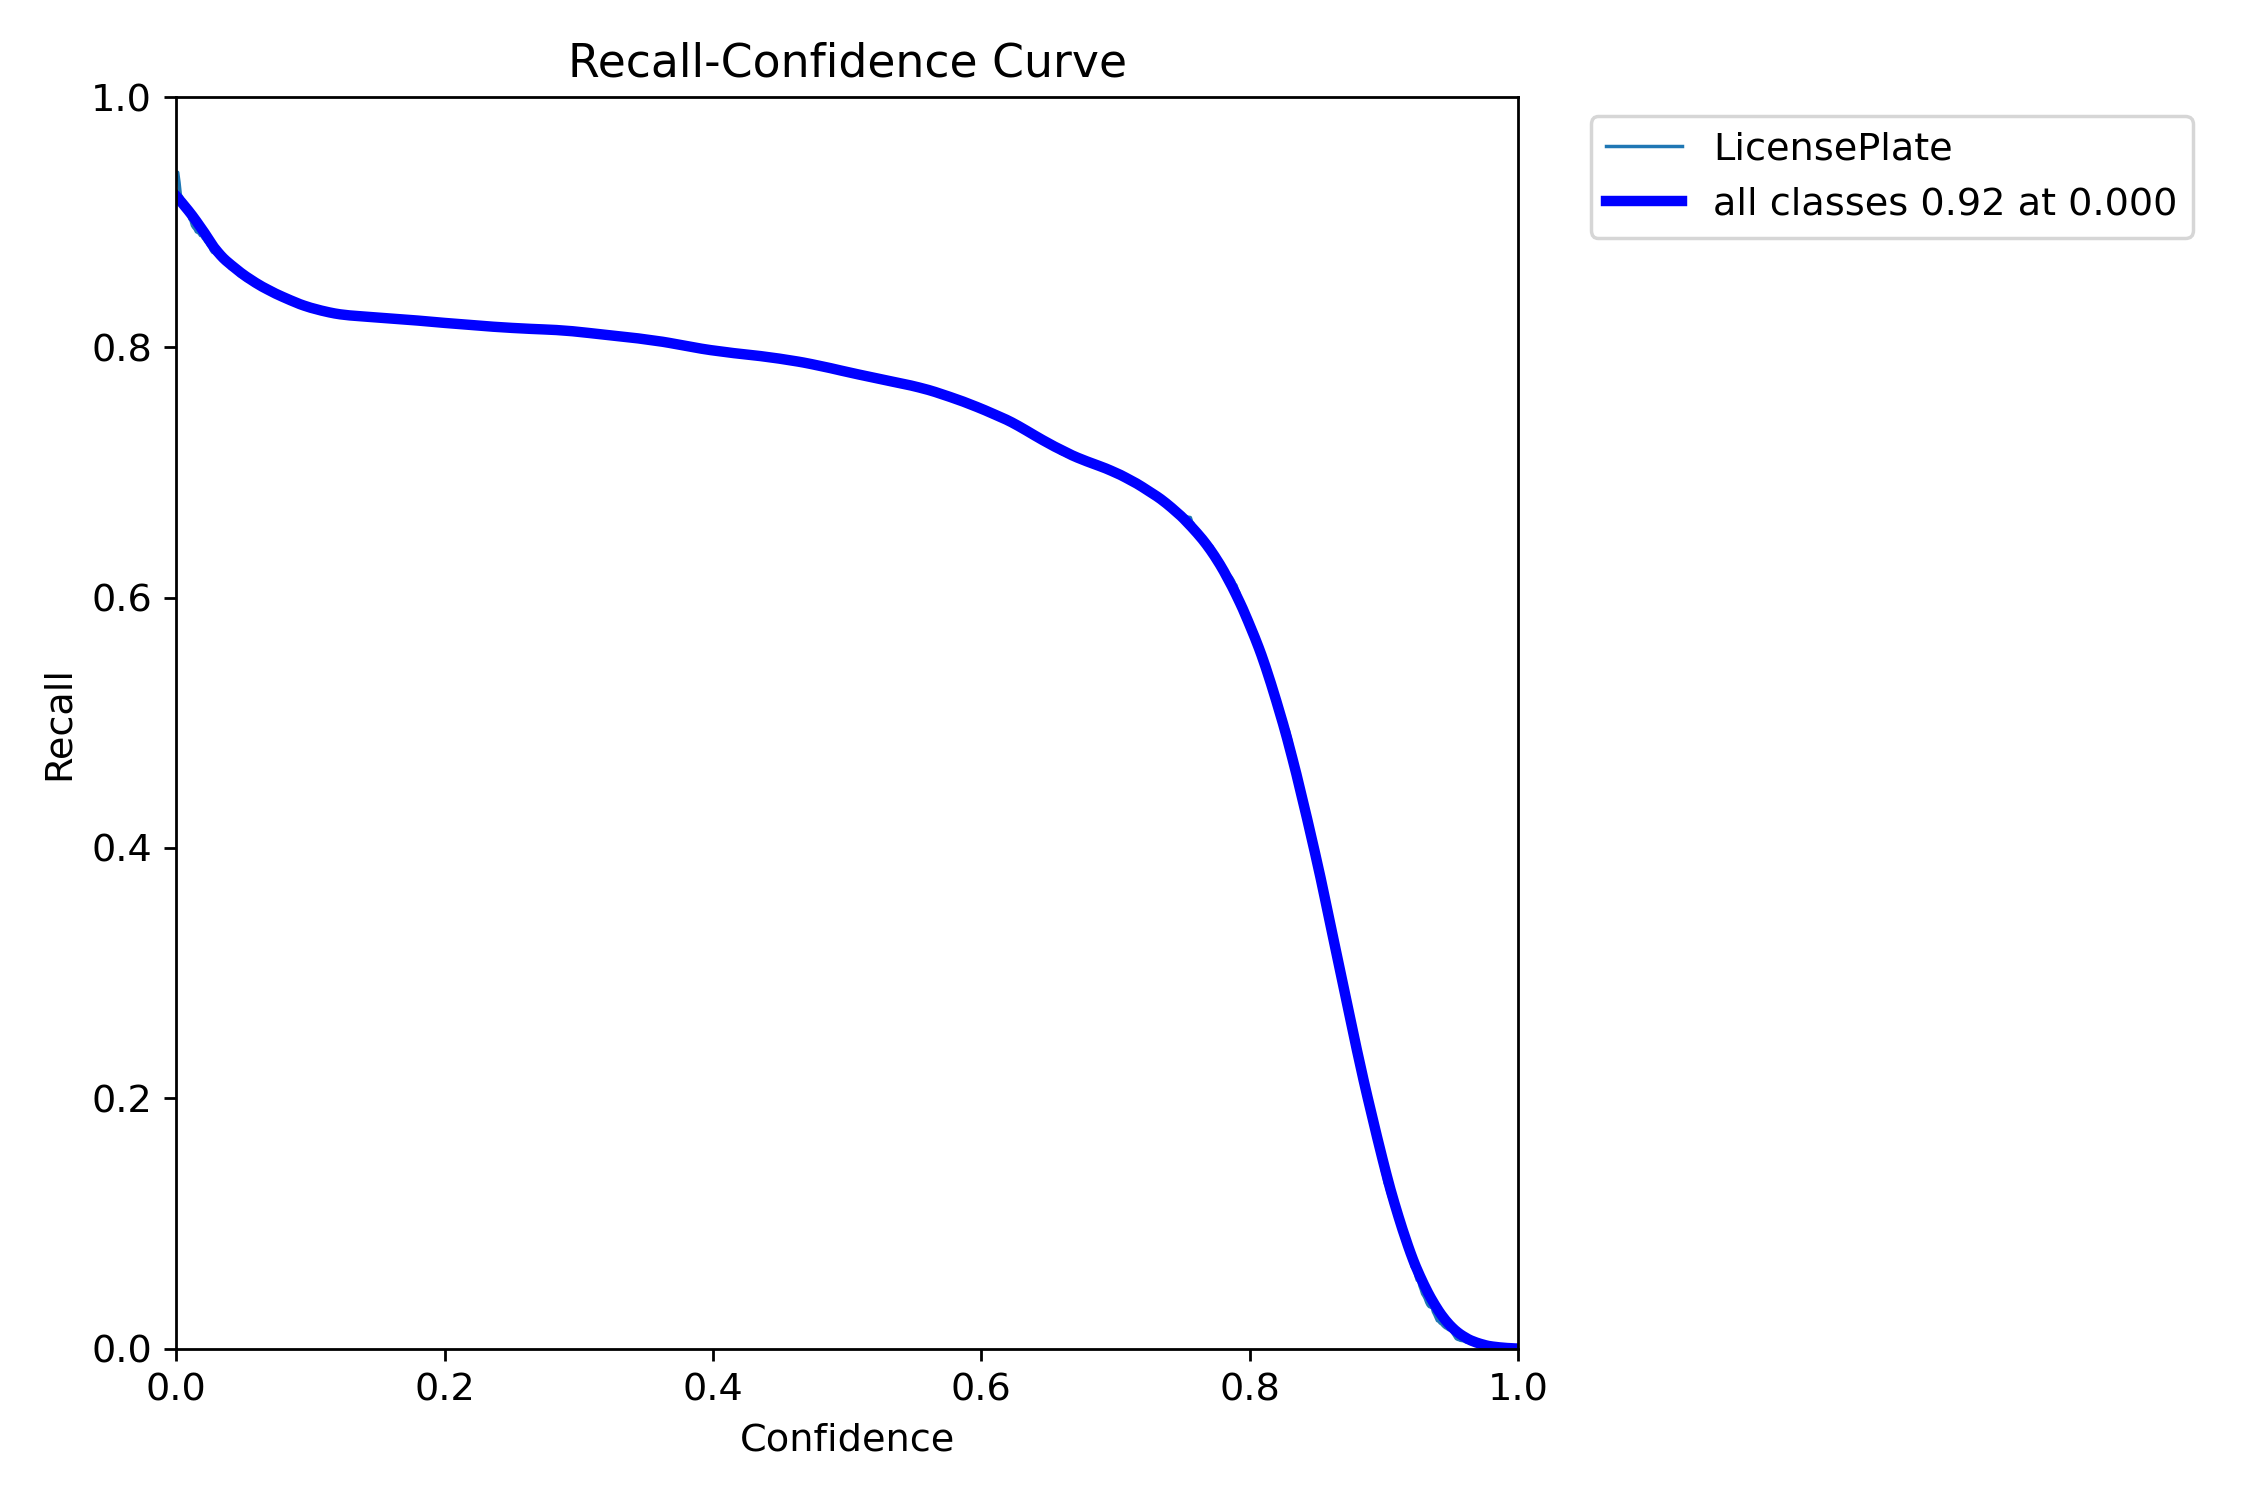

In [ ]:
Image(filename=f'/content/runs/detect/train/R_curve.png',width=600)

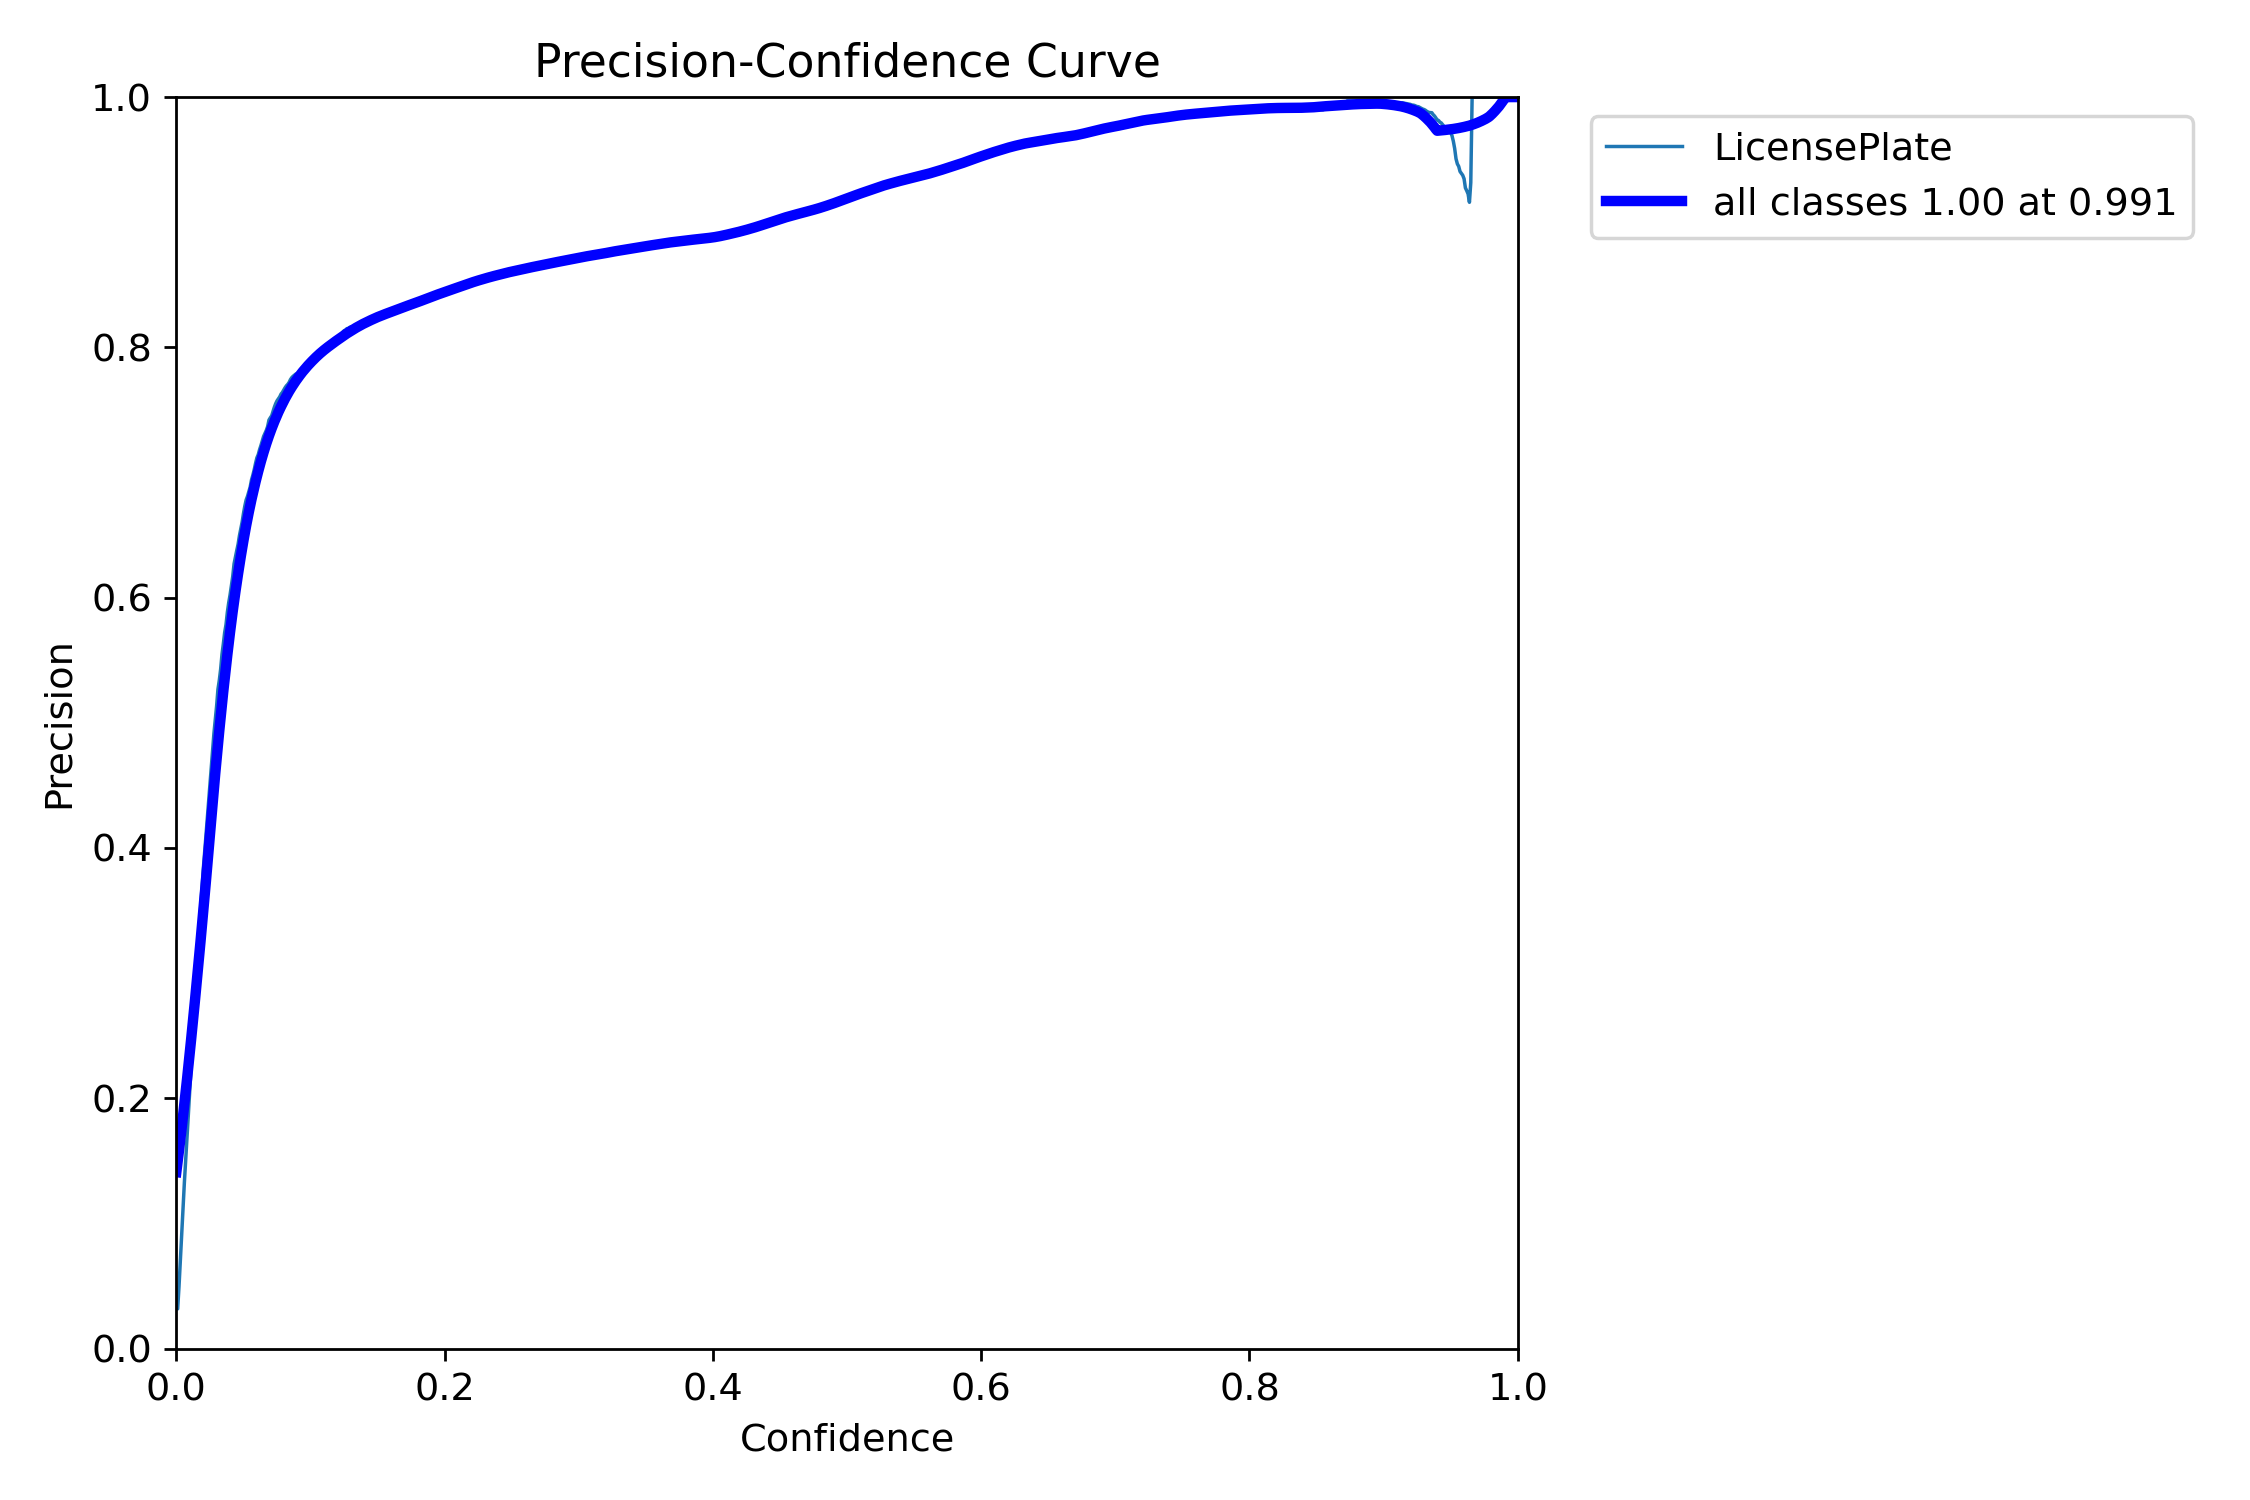

In [ ]:
Image(filename=f'/content/runs/detect/train/P_curve.png',width=600)

# check training batches to detect

.

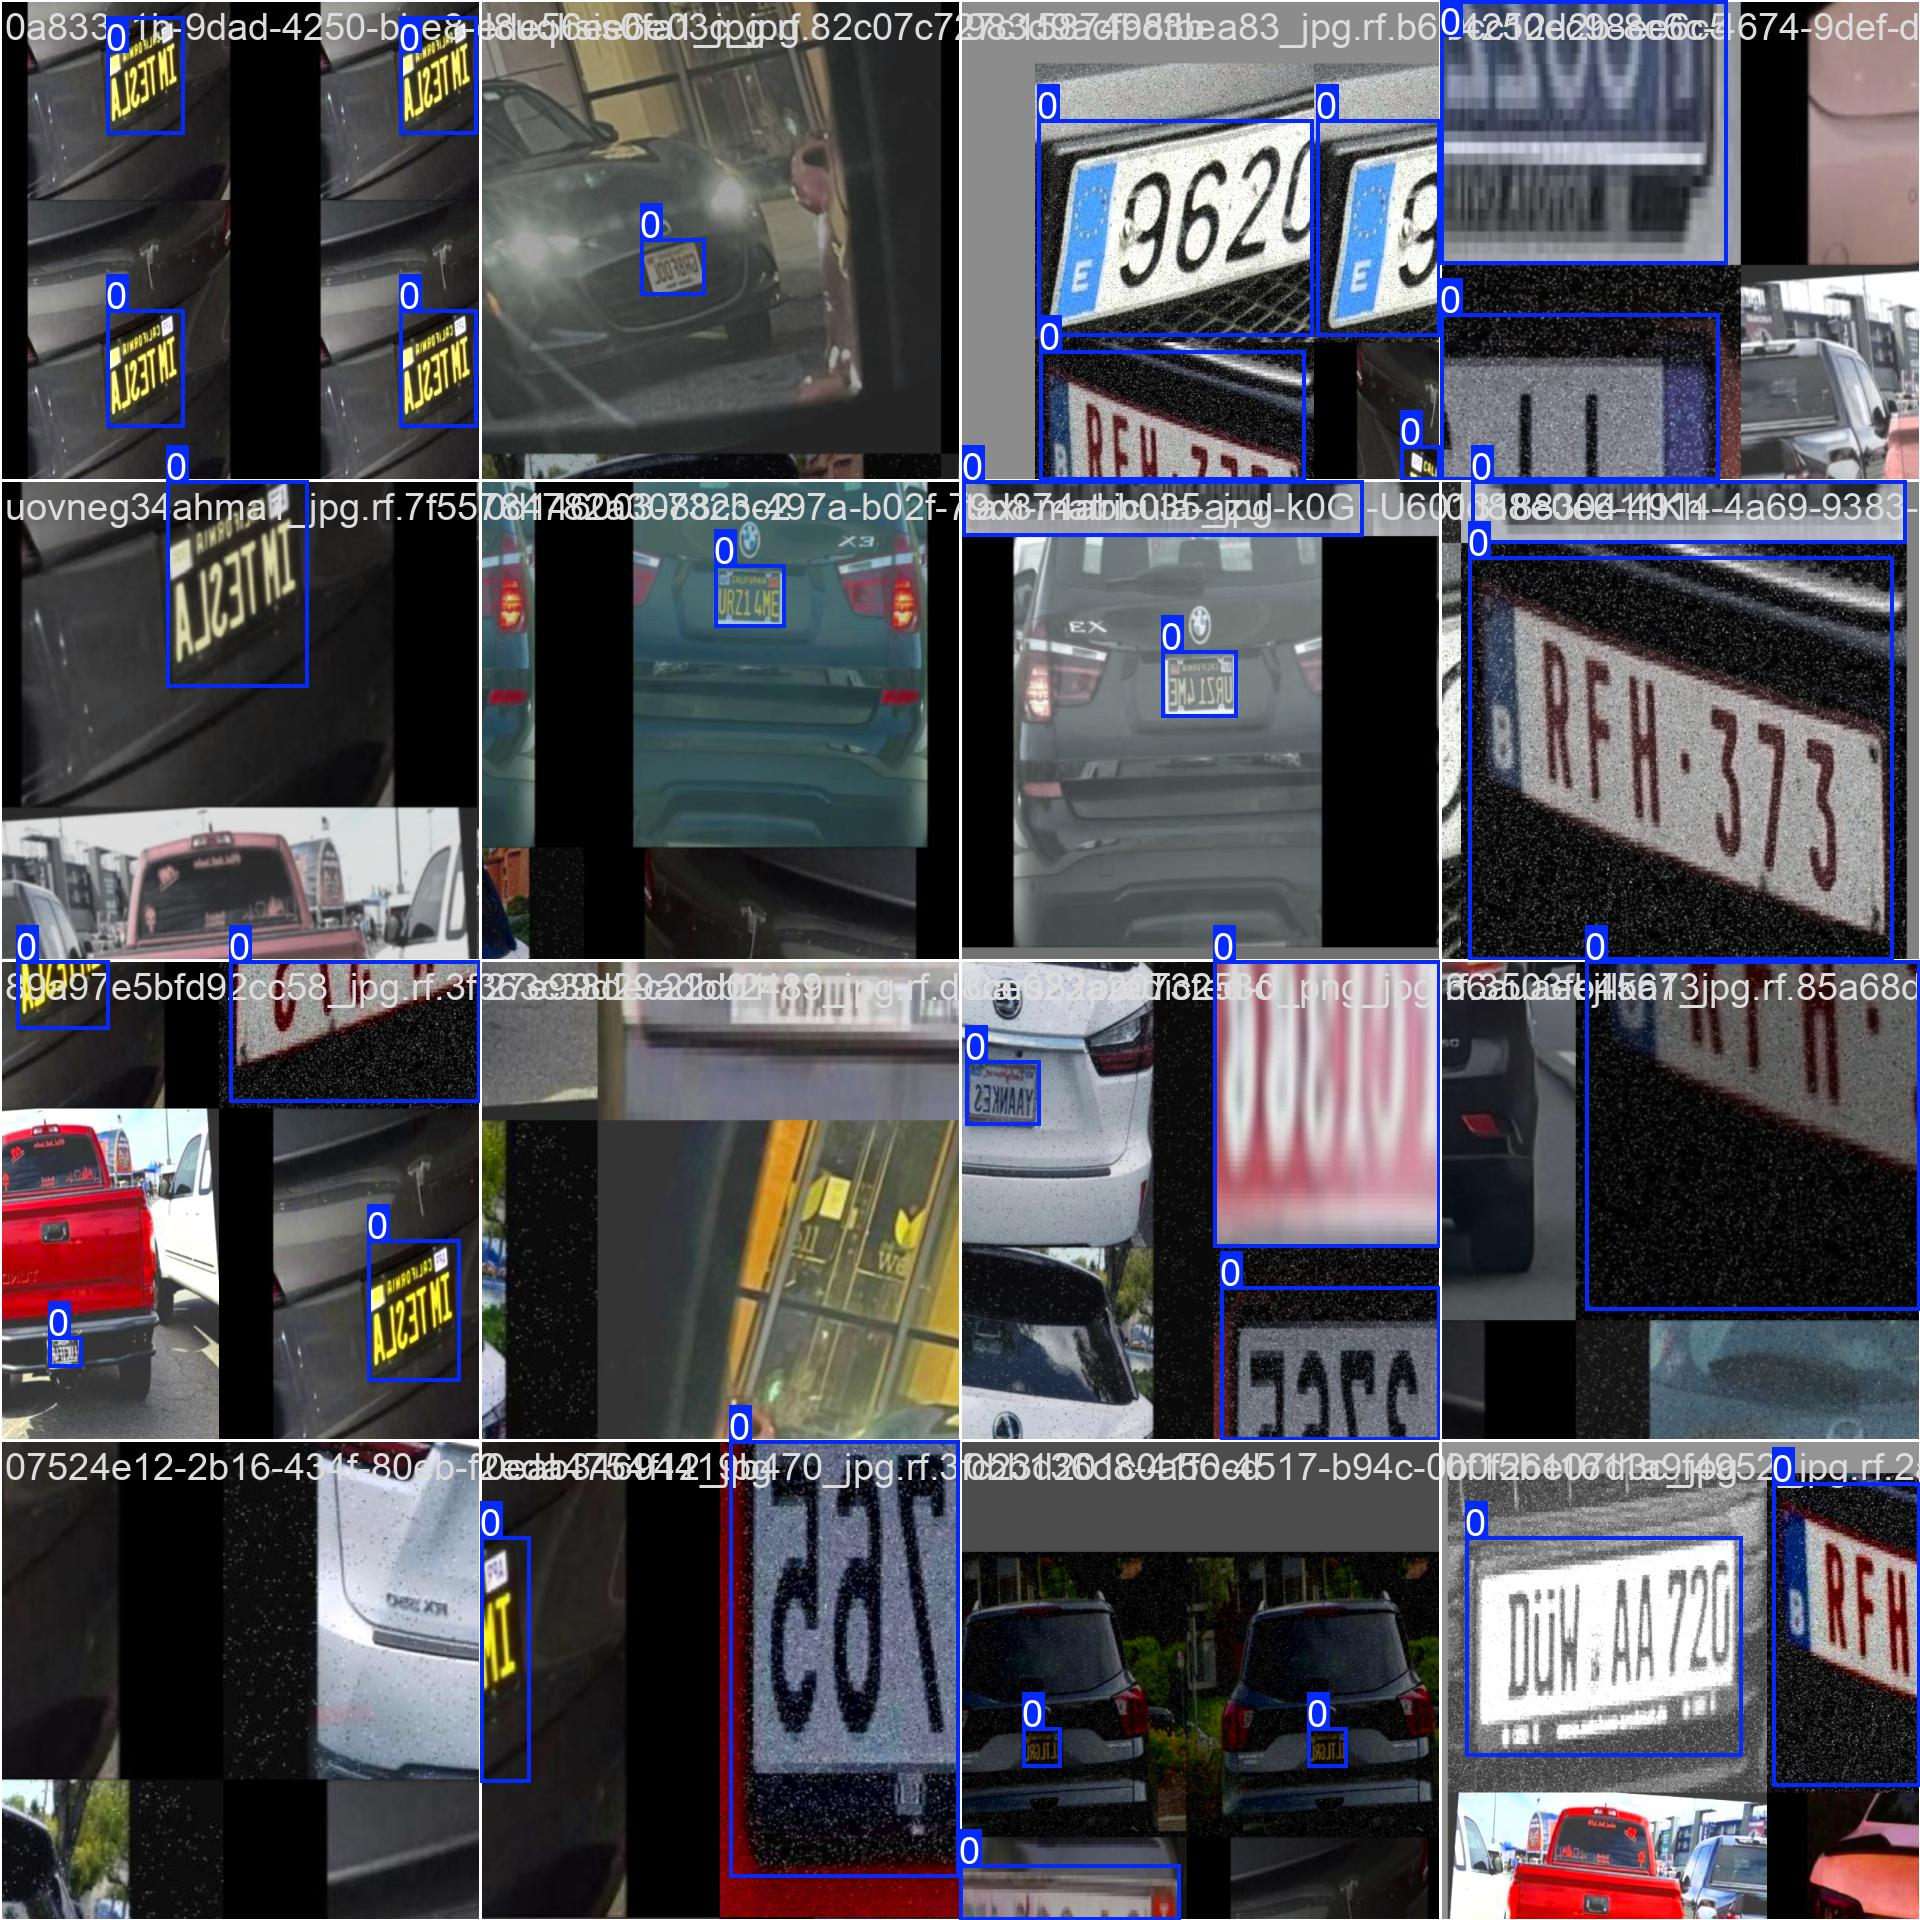

In [ ]:
Image(filename=f'/content/runs/detect/train/train_batch0.jpg',width=600)

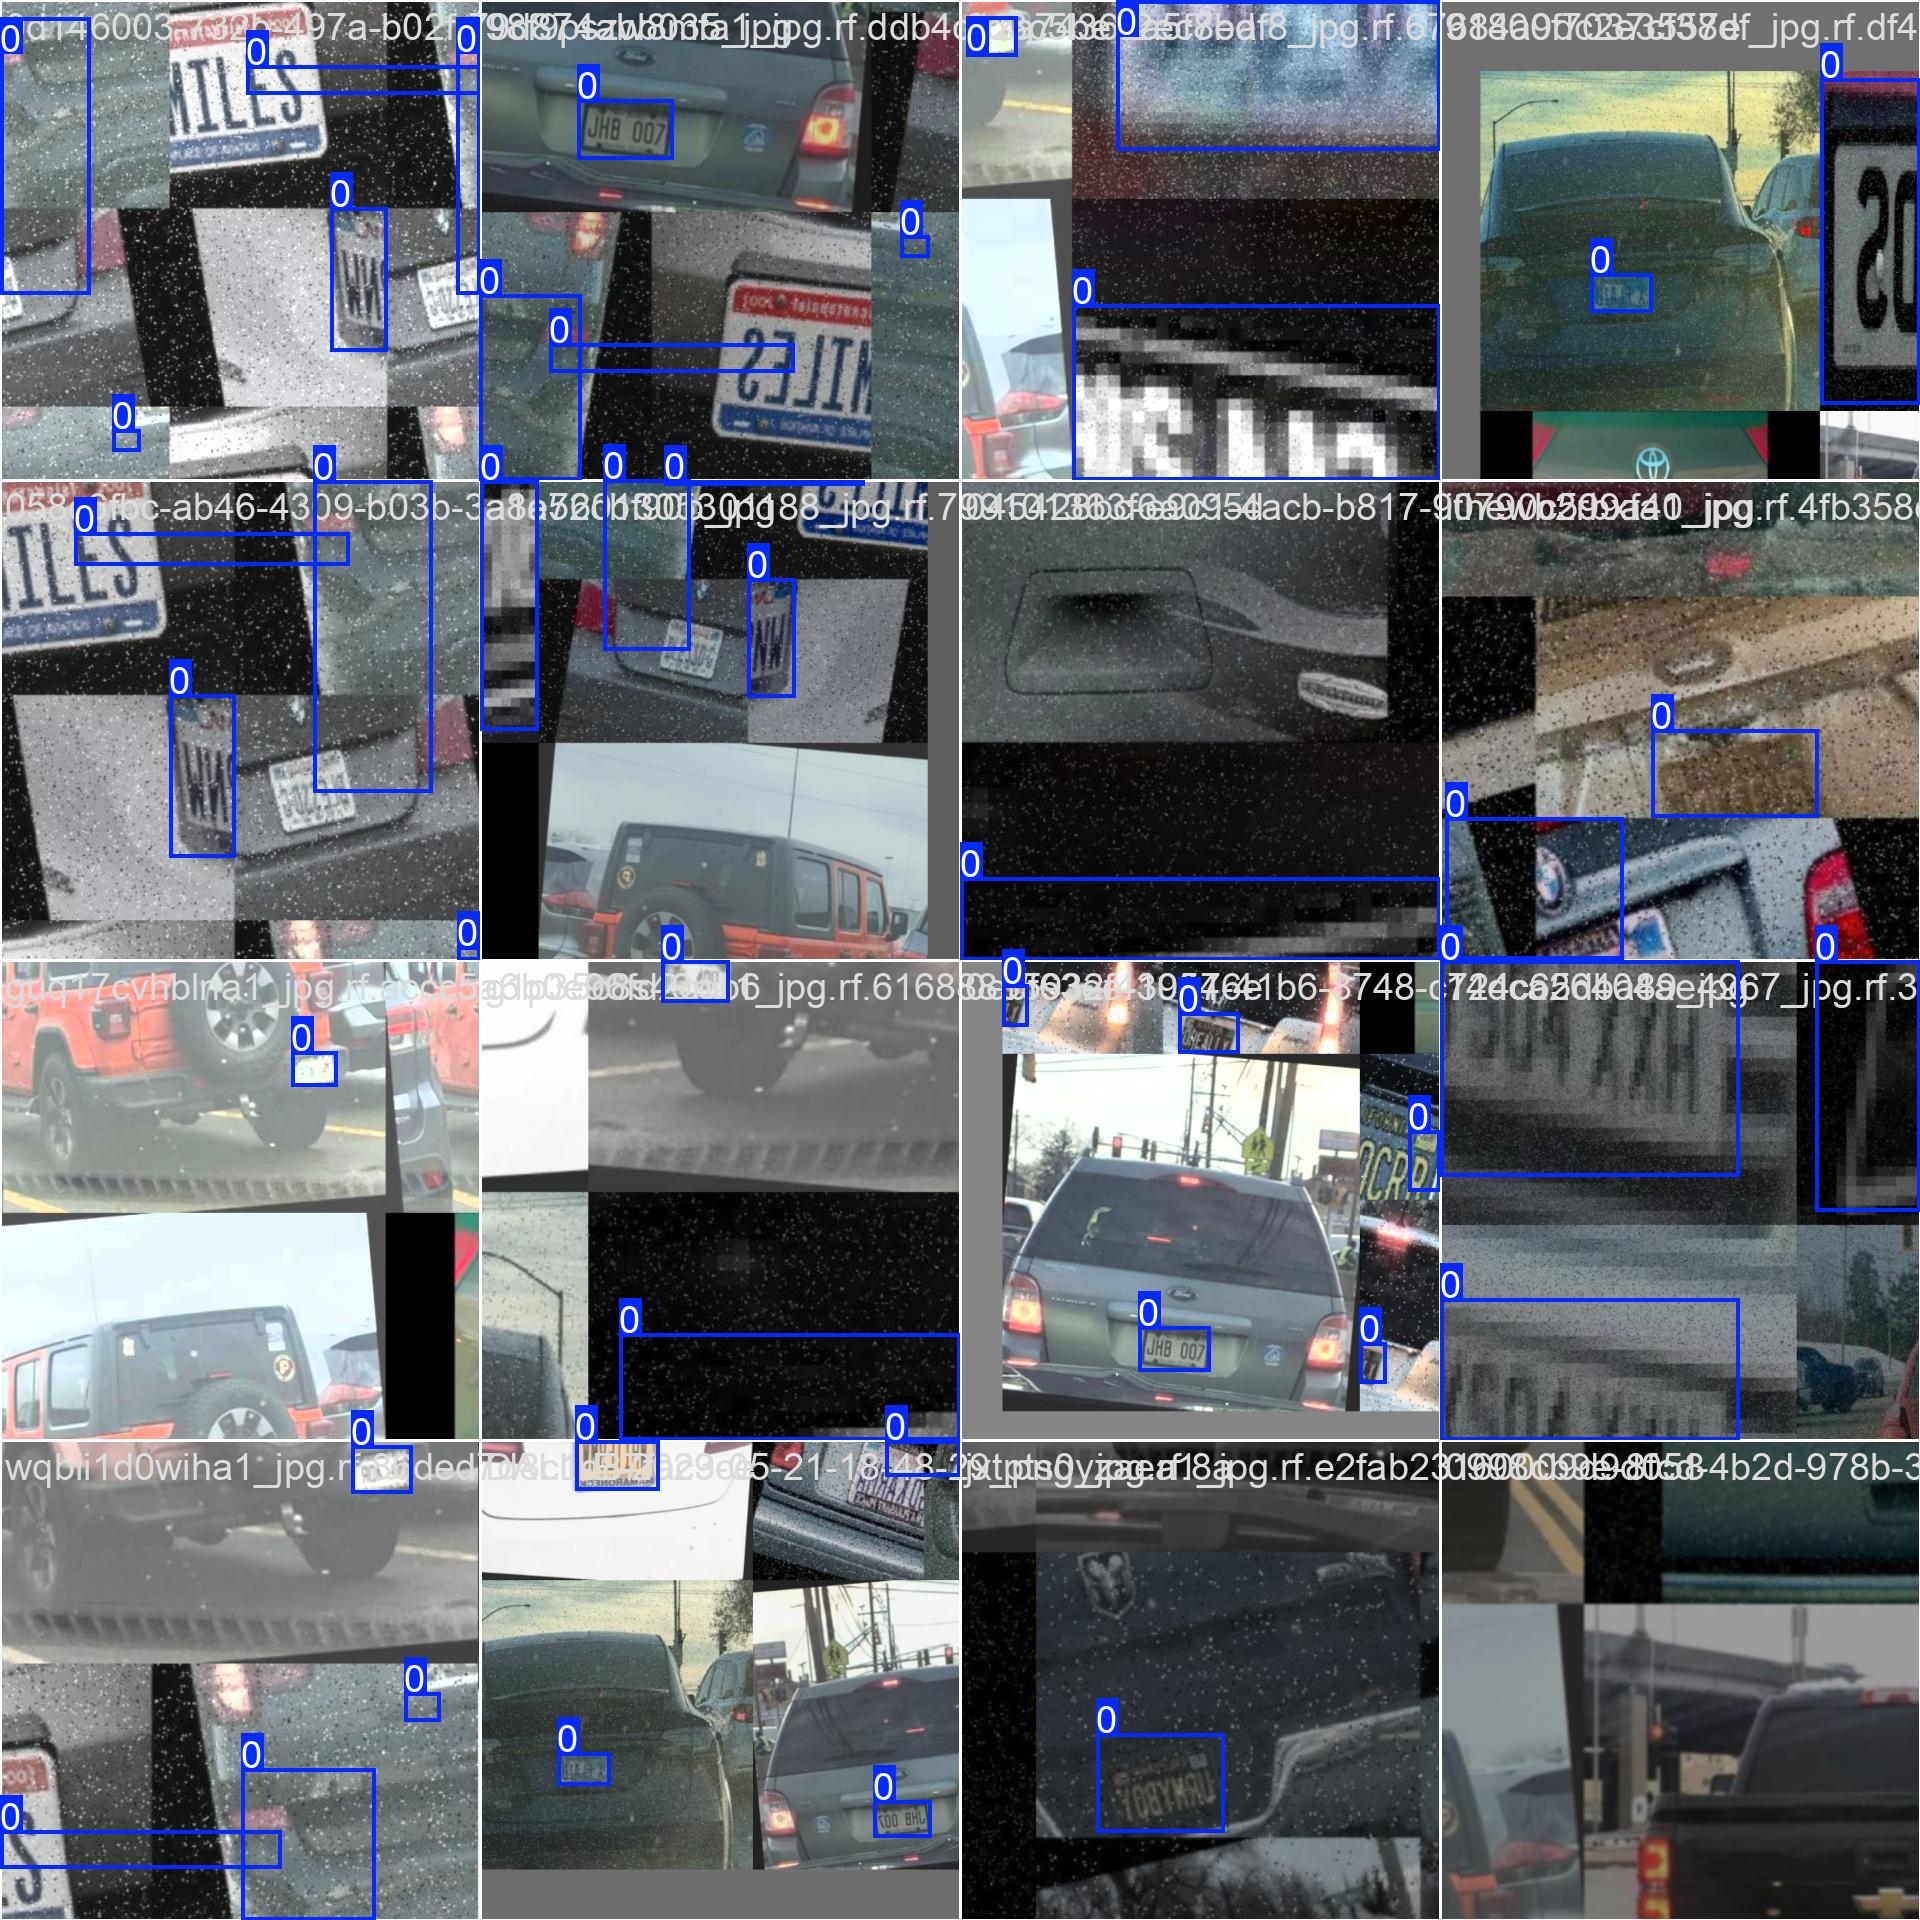

In [ ]:
Image(filename=f'/content/runs/detect/train/train_batch1.jpg',width=600)

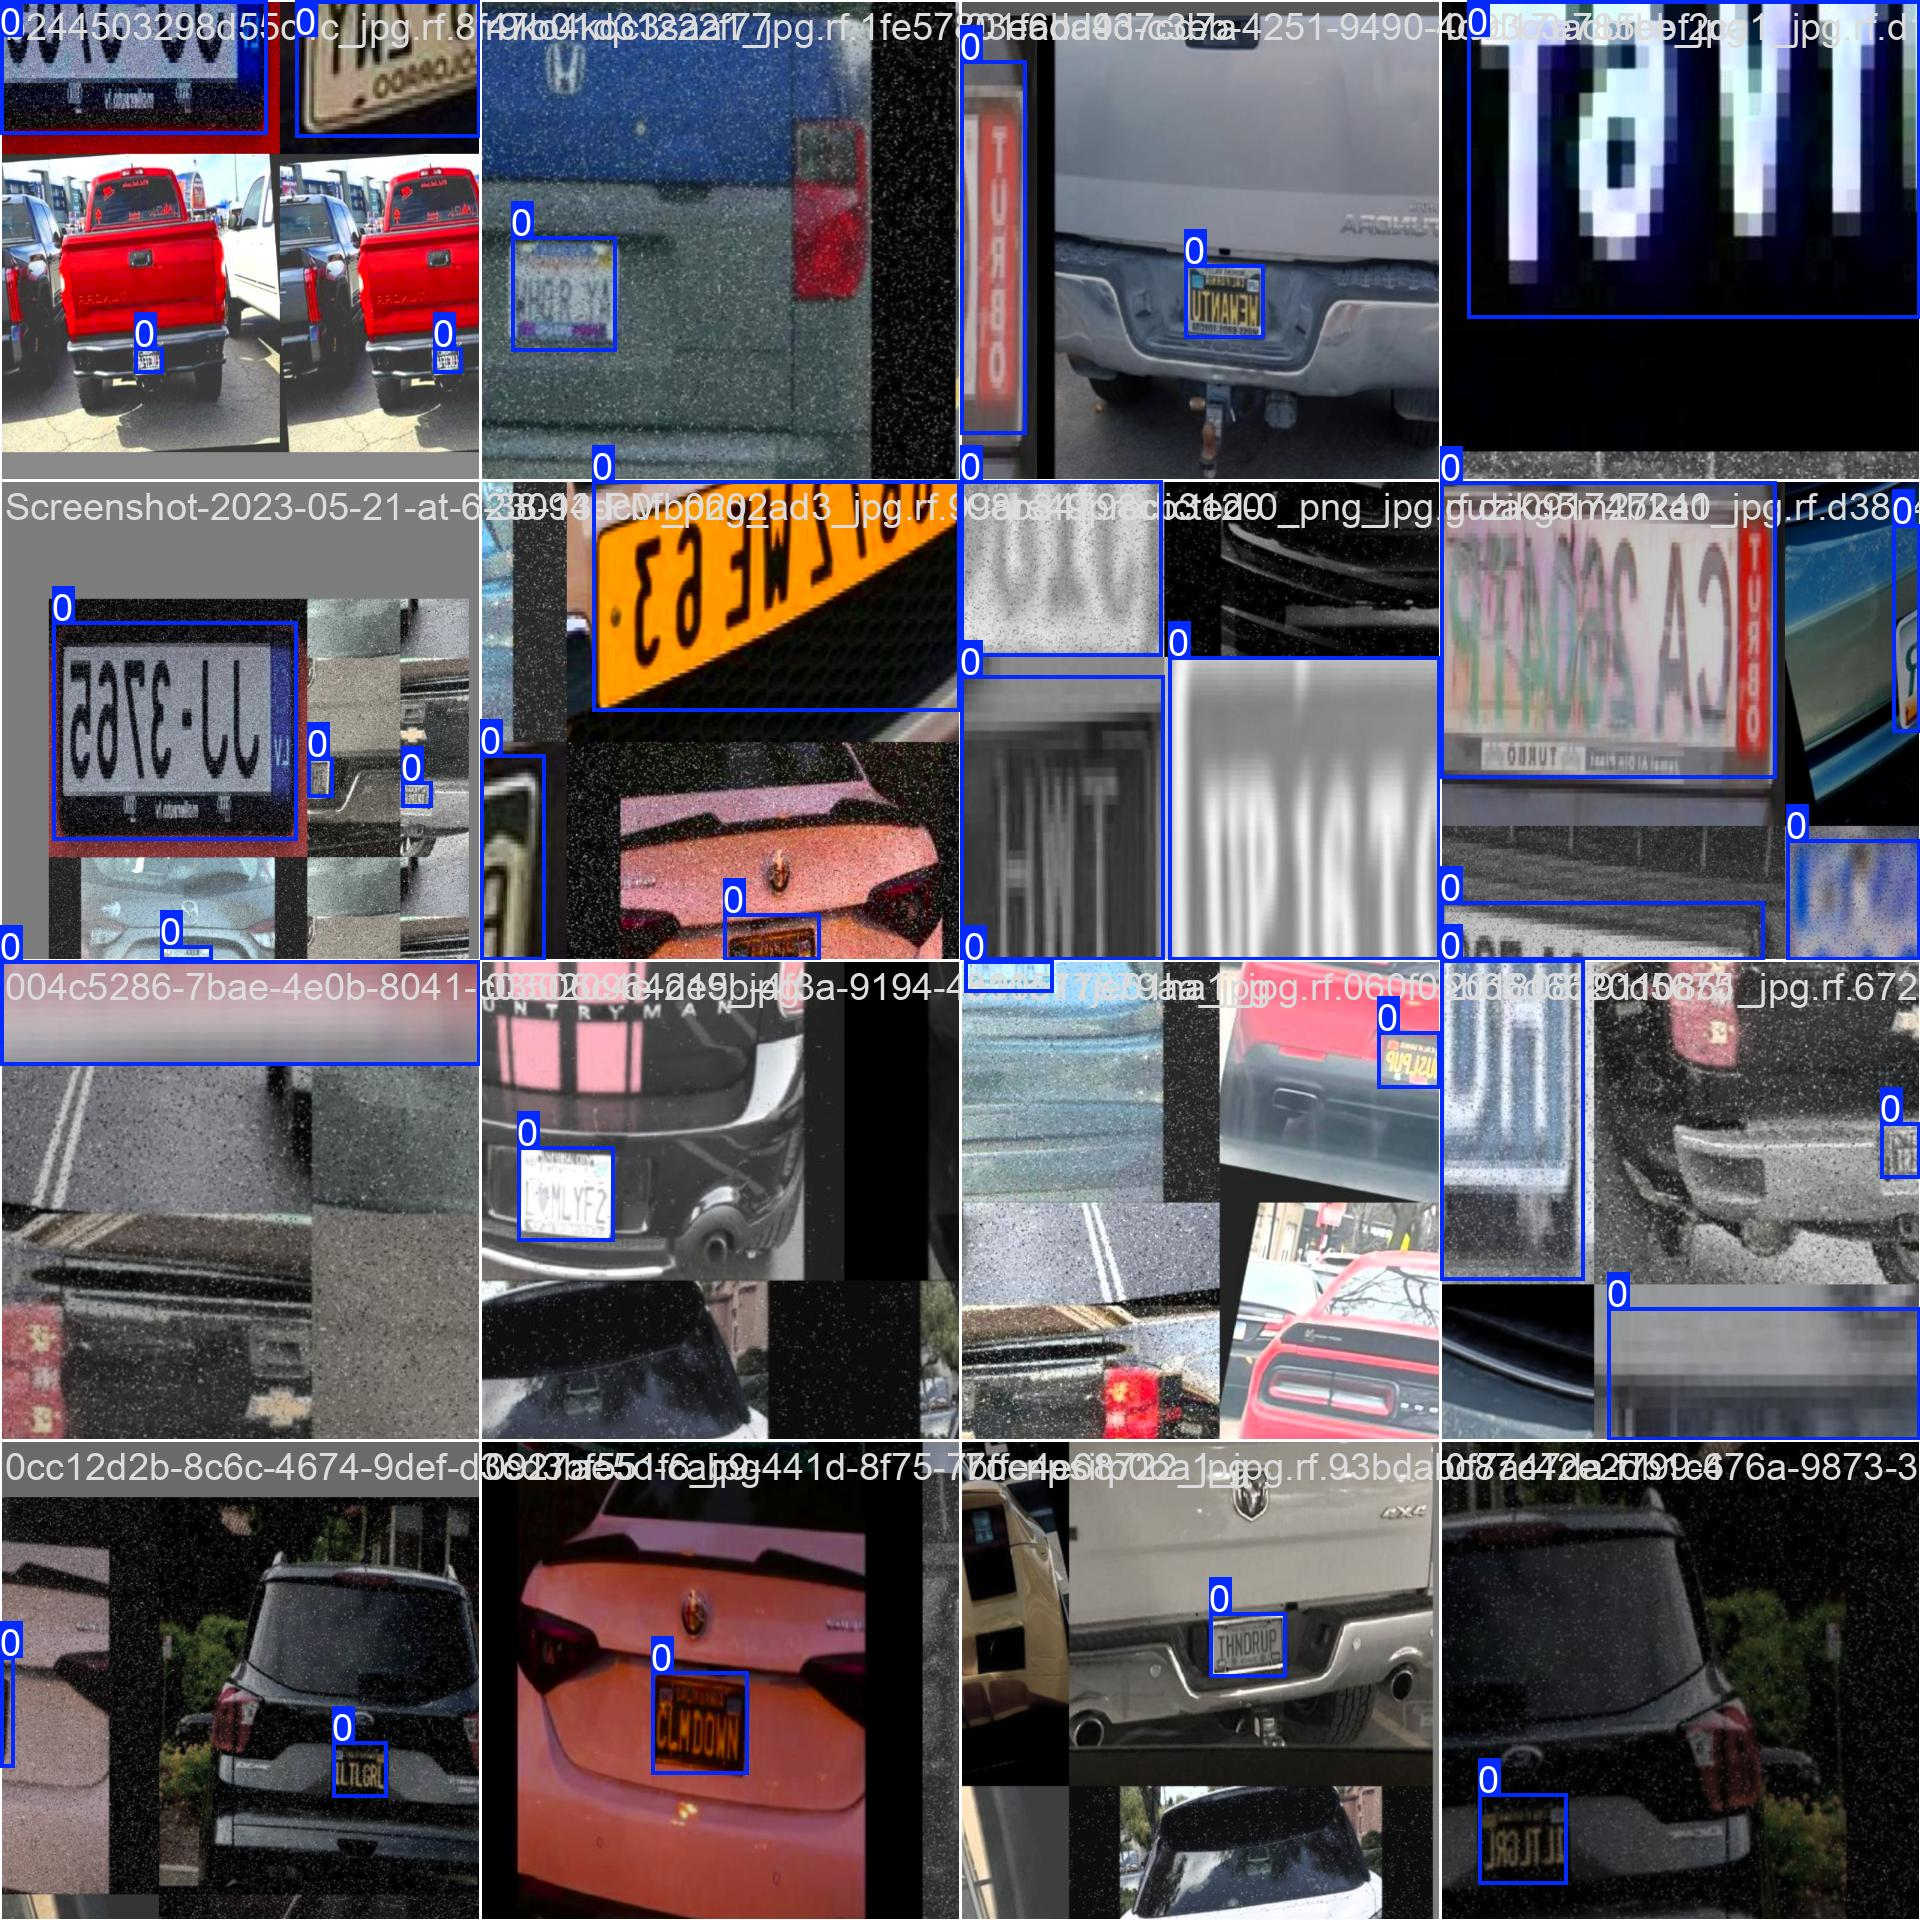

In [ ]:
Image(filename=f'/content/runs/detect/train/train_batch2.jpg',width=600)

# Validation batches

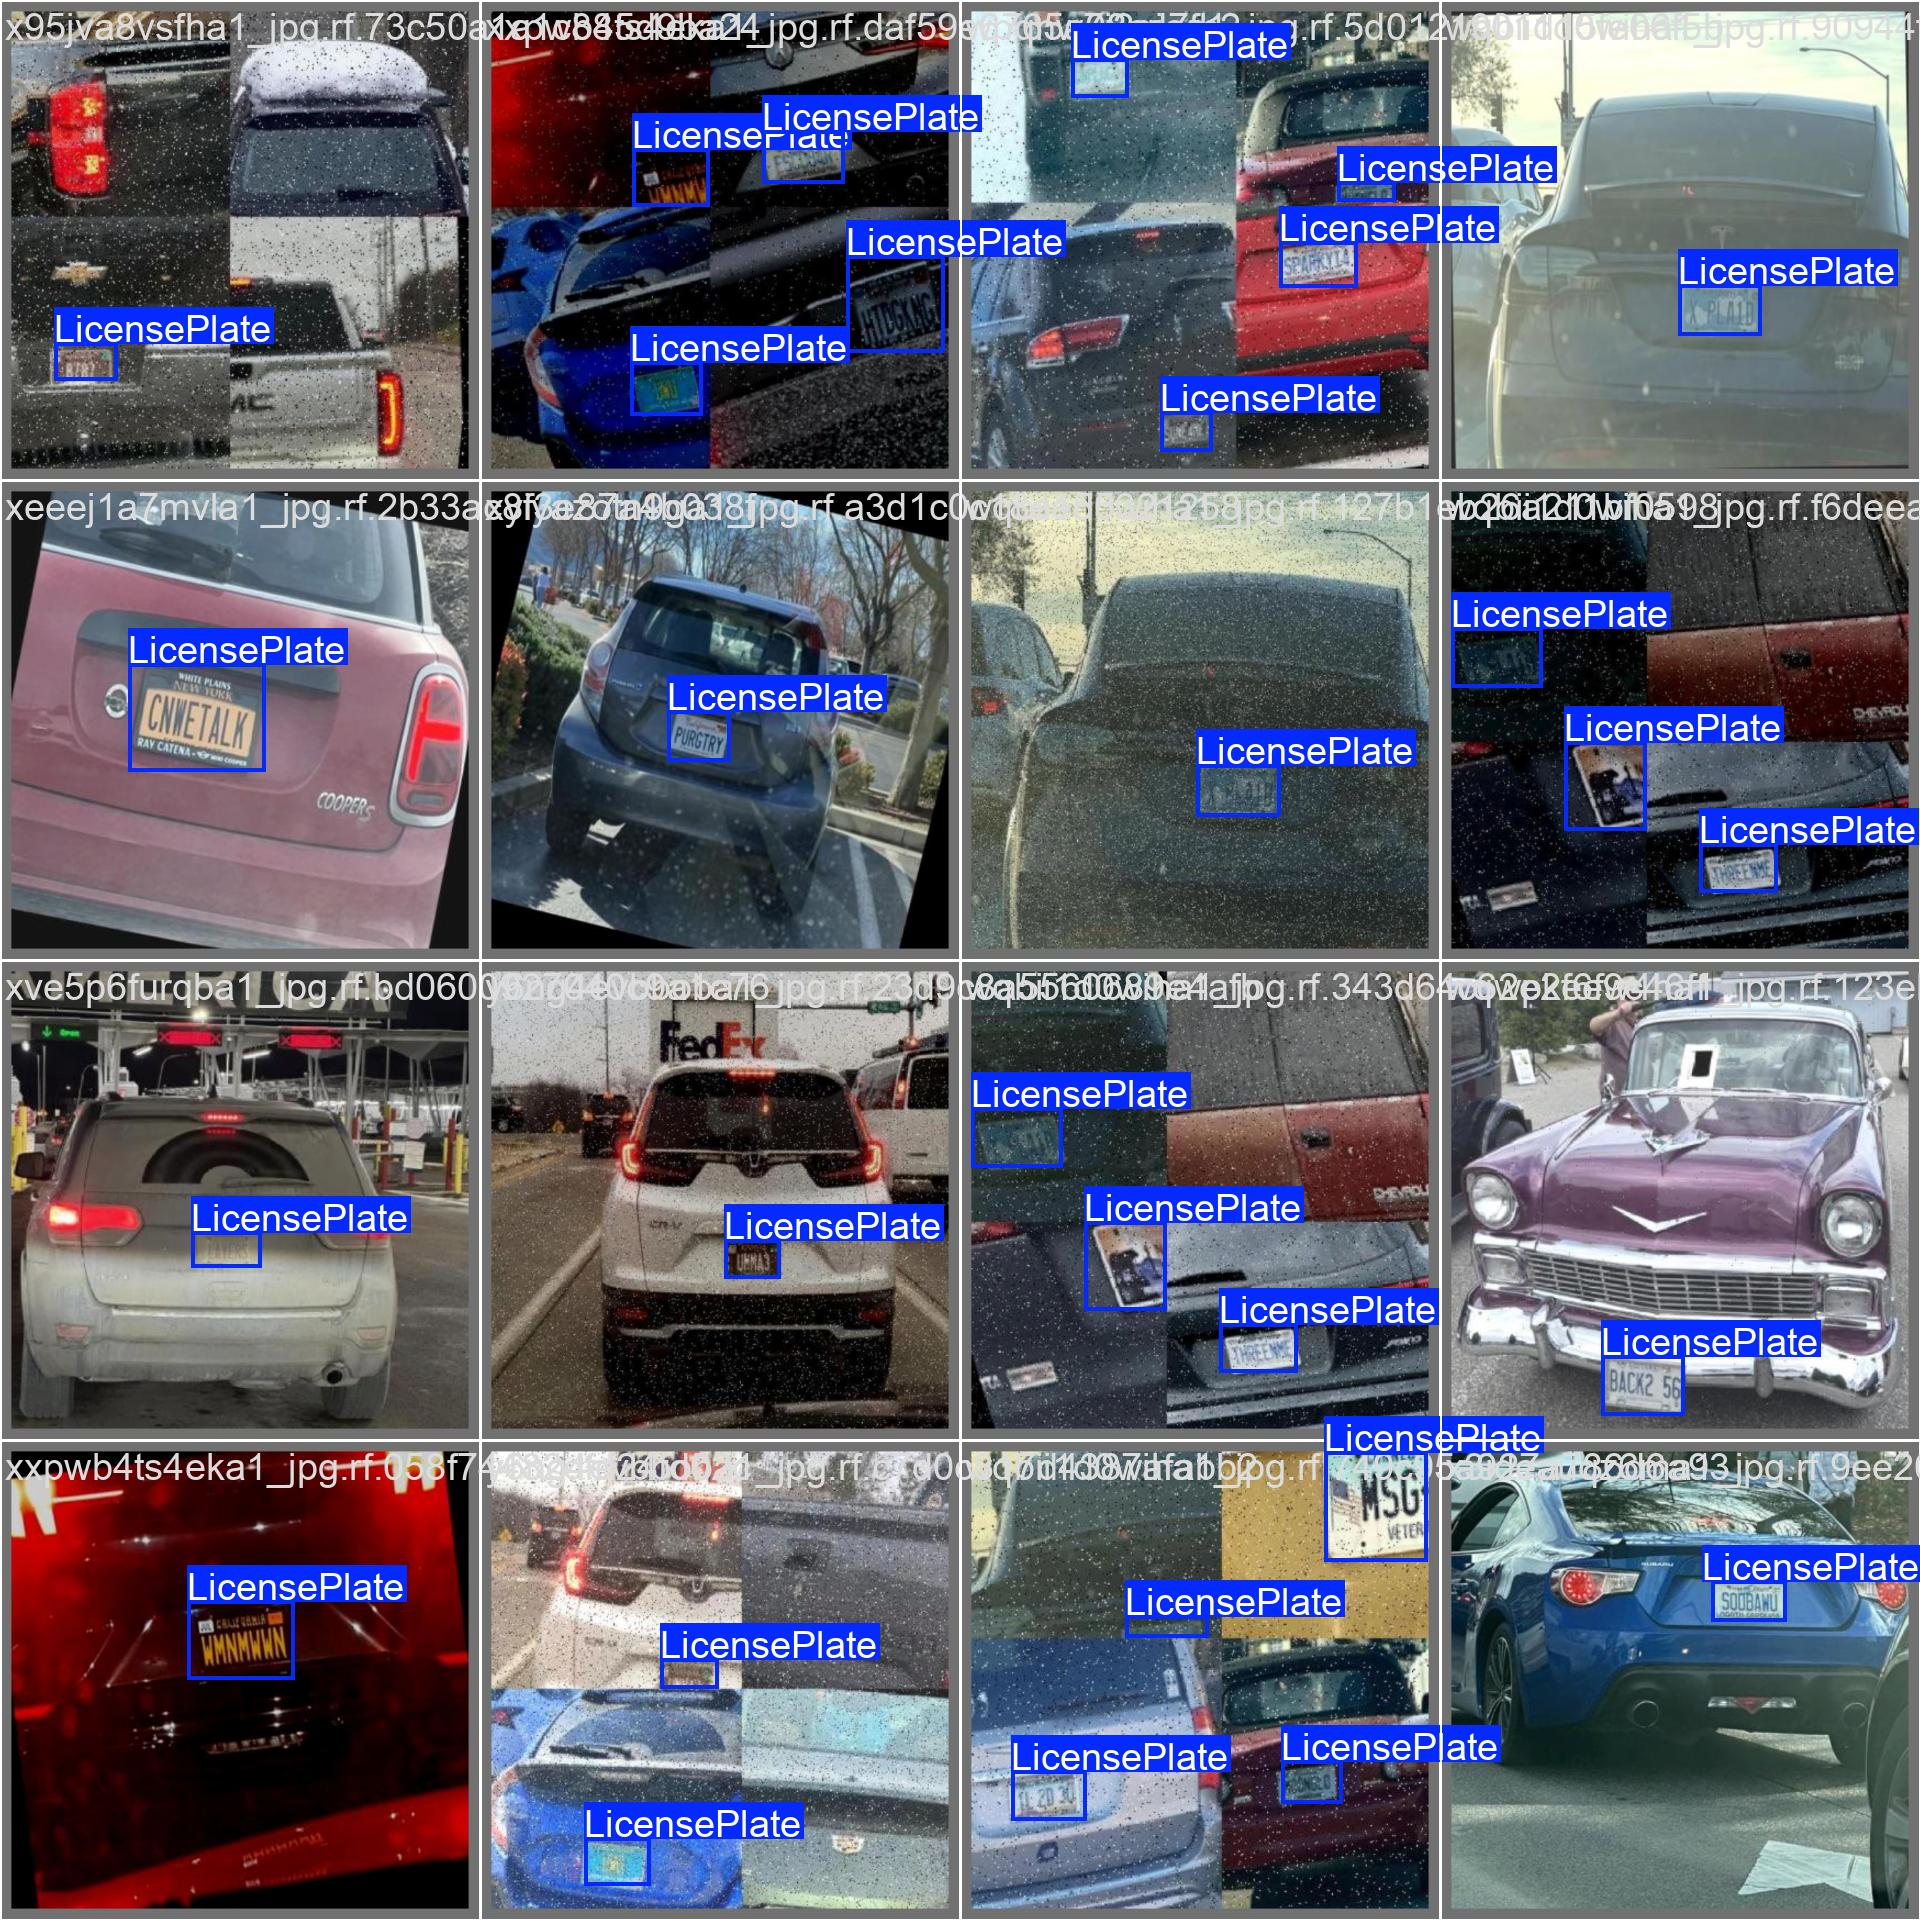

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch0_labels.jpg',width=600)

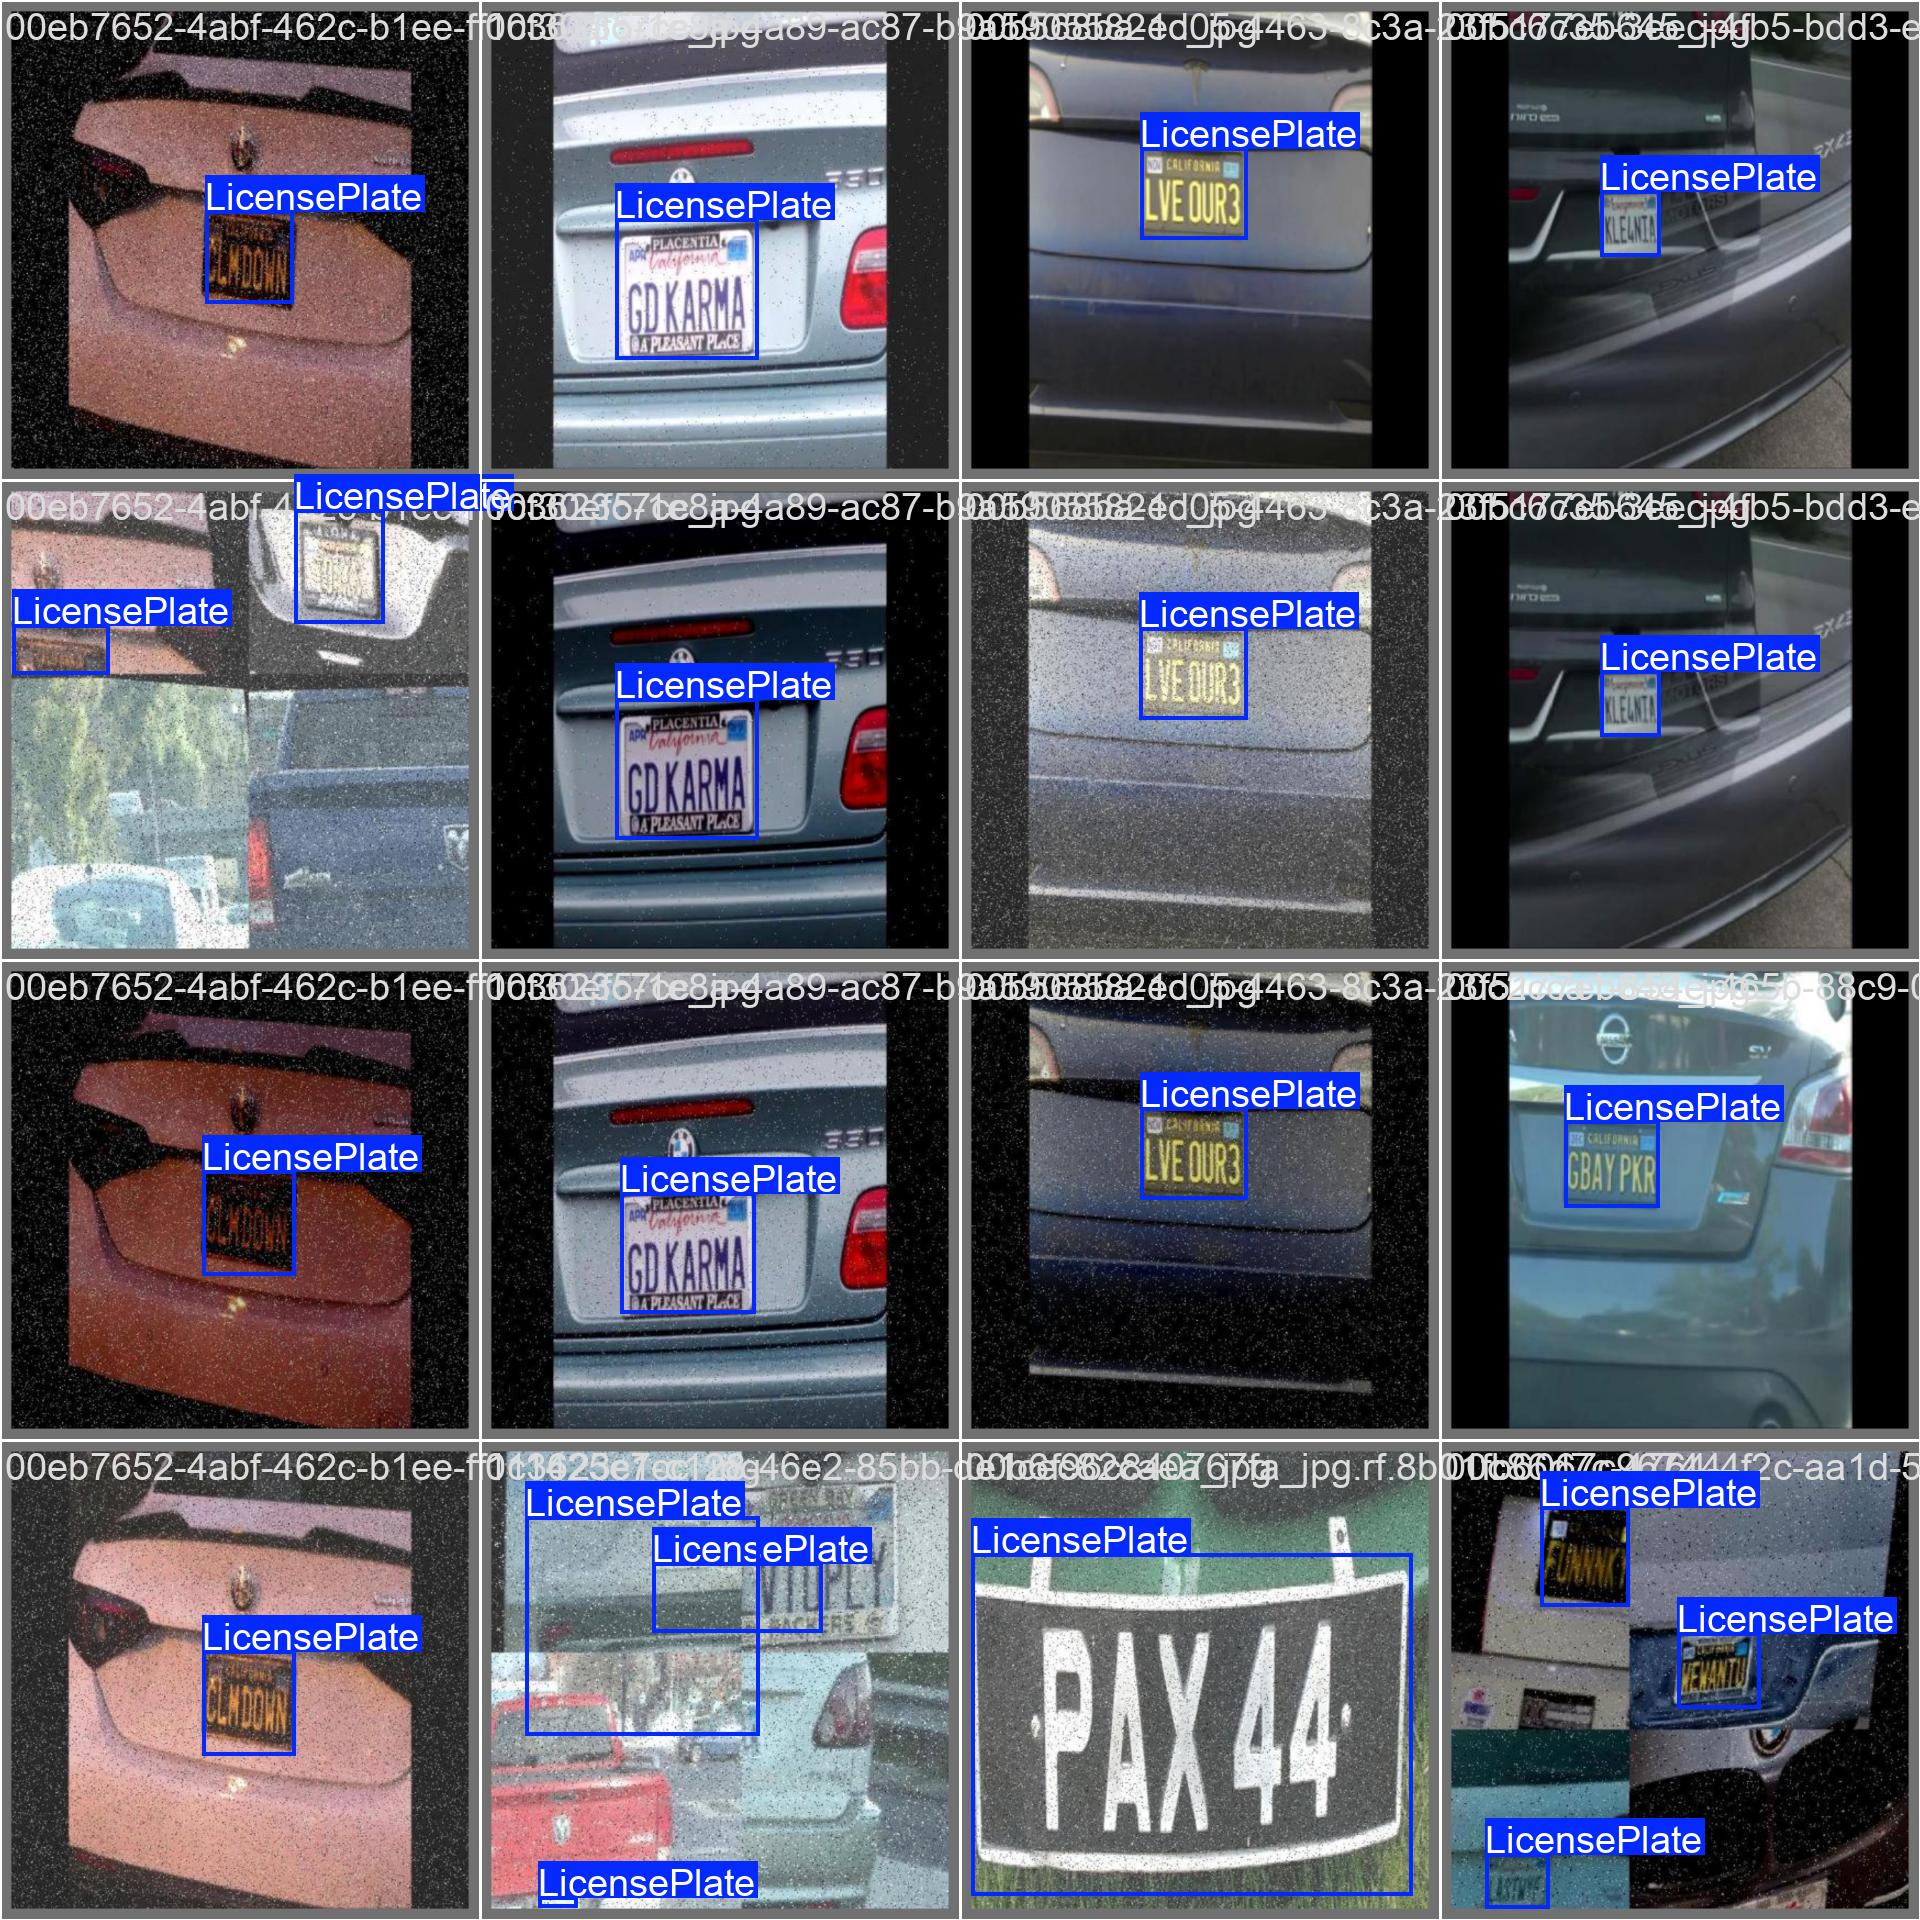

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch1_labels.jpg',width=600)

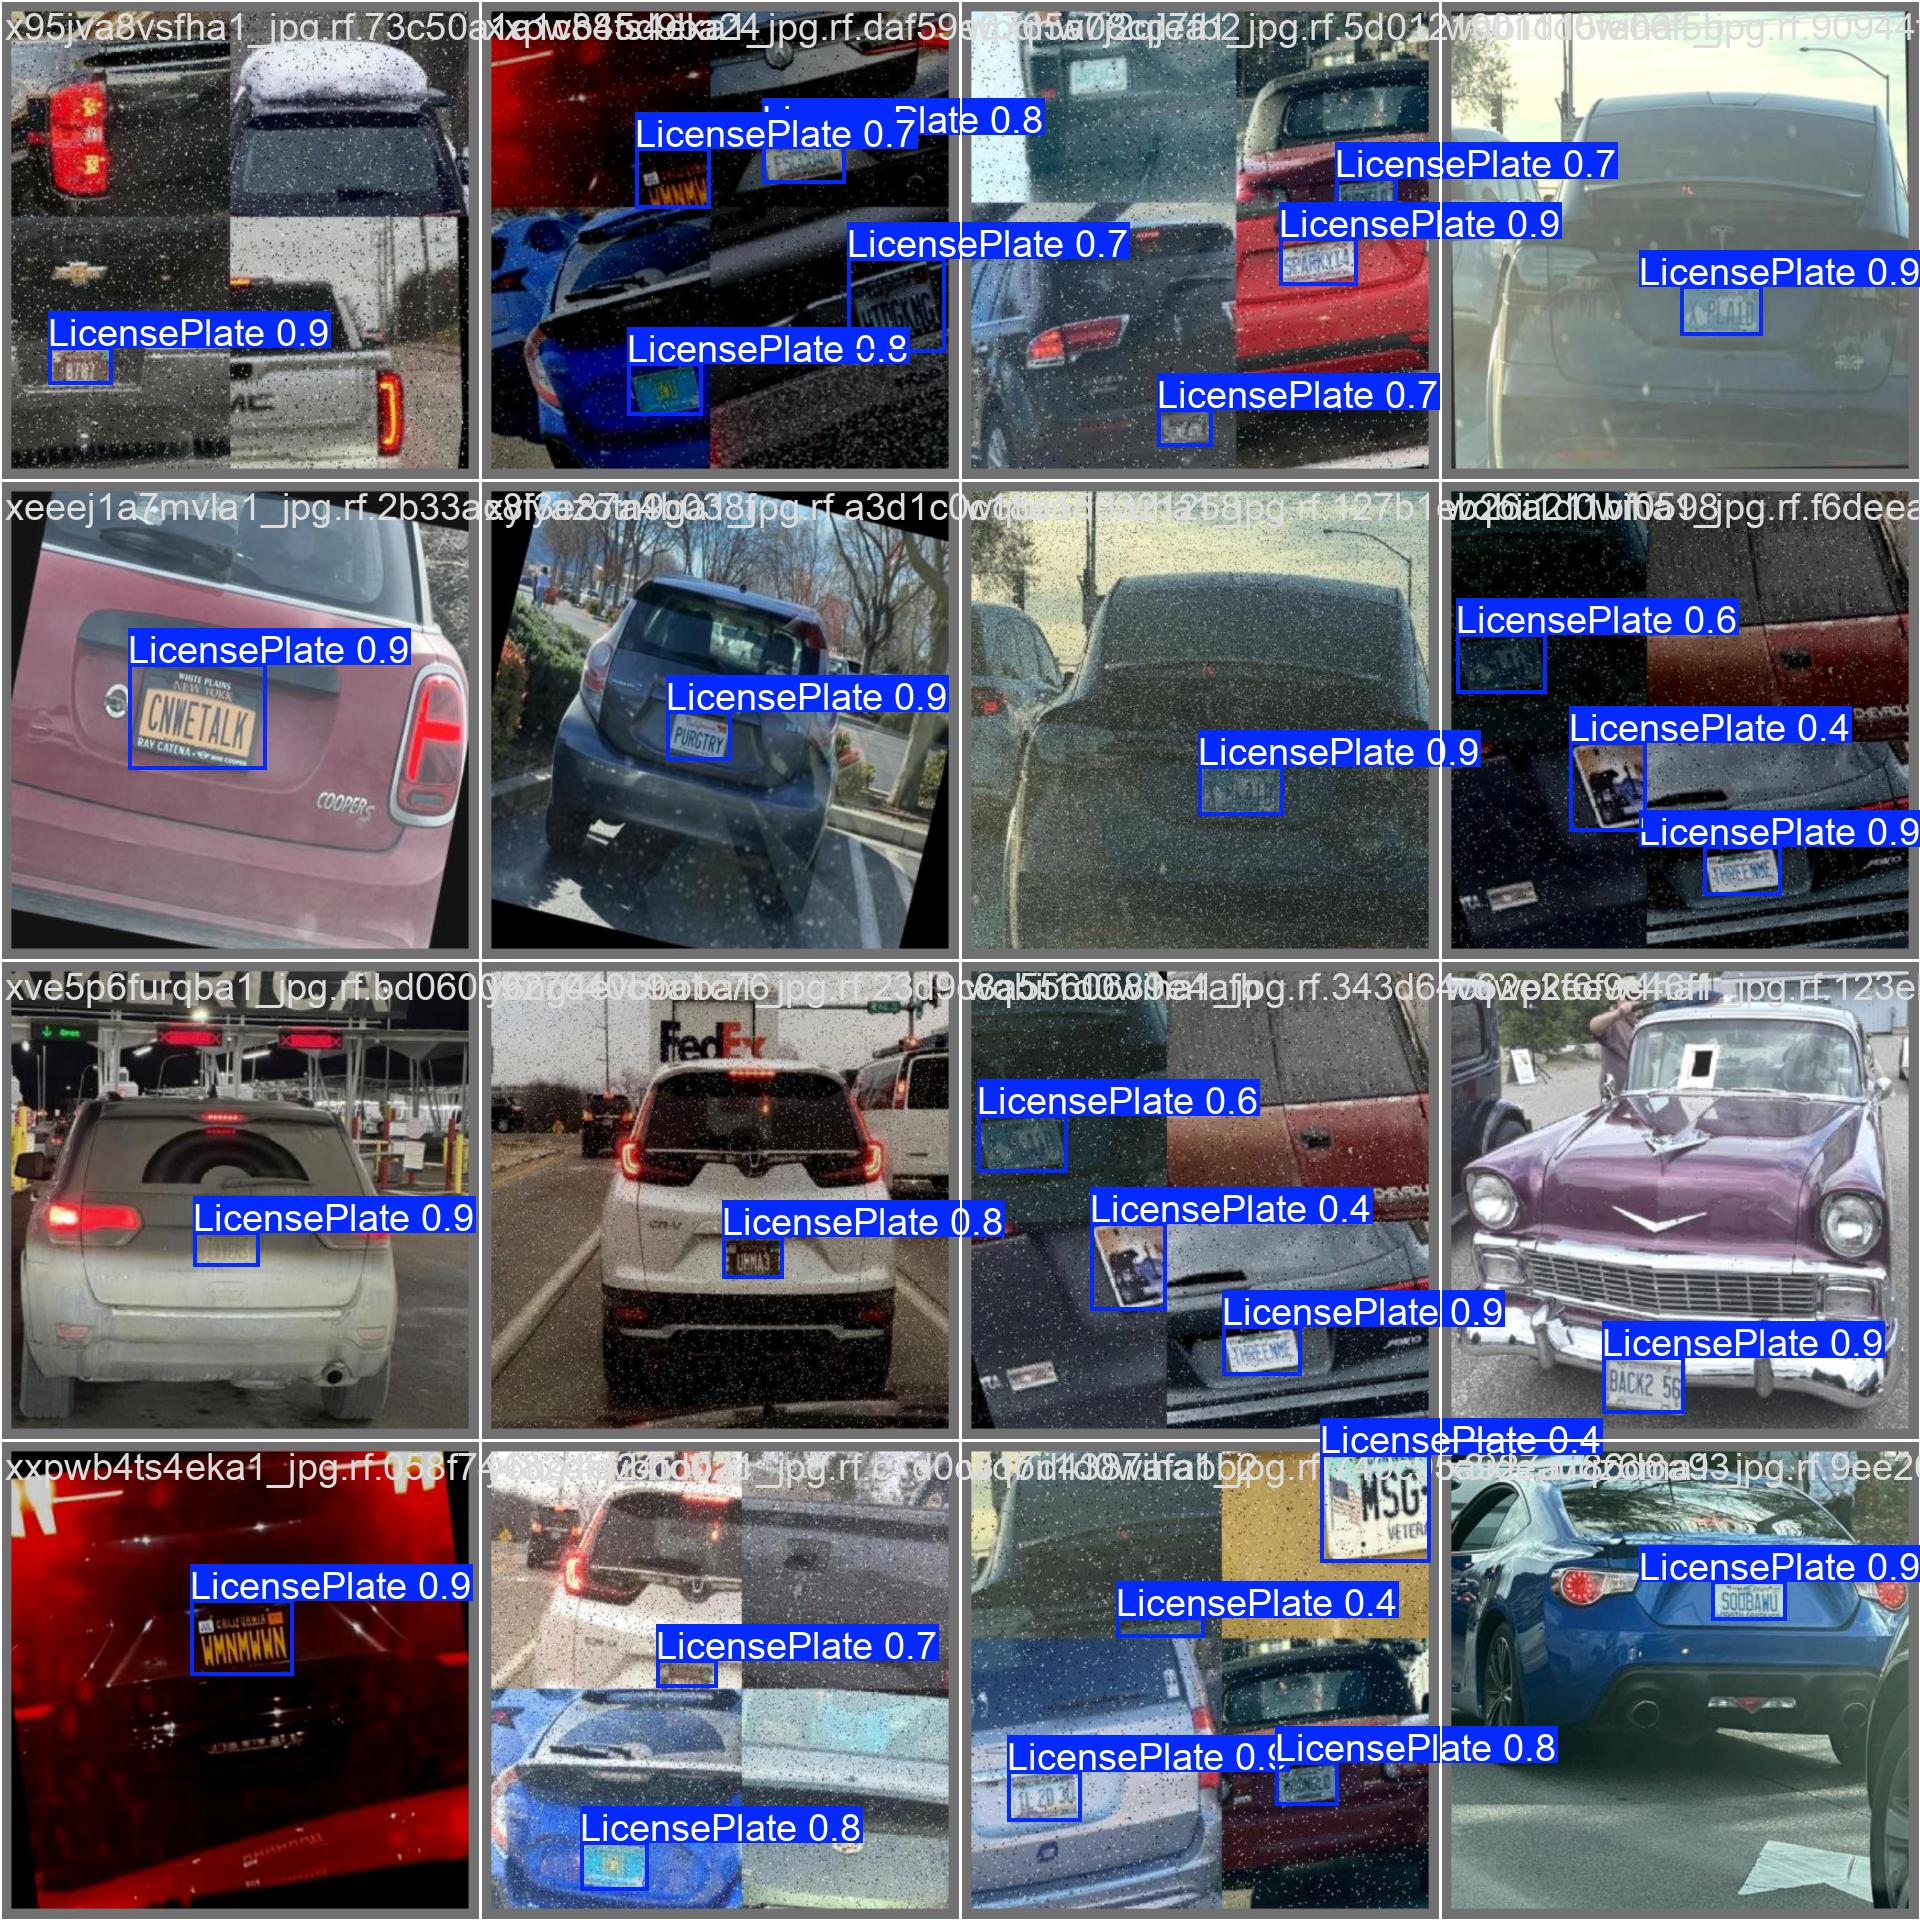

In [ ]:
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg',width=600)

# Evalute our model on test data which is unseen


image 1/1 /content/Tablice-5/test/images/0029cb5bf907f89e_jpg.rf.19f24b3685a975b609a5db04d3b19d99.jpg: 640x640 1 LicensePlate, 12.4ms
Speed: 2.8ms preprocess, 12.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


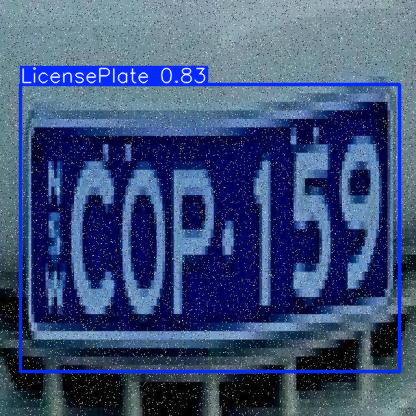

In [ ]:
model=YOLO('/content/runs/detect/train/weights/best.pt') # Used our train model waights
result=model('/content/Tablice-5/test/images/0029cb5bf907f89e_jpg.rf.19f24b3685a975b609a5db04d3b19d99.jpg') # Test iamge
result[0].show()


image 1/1 /content/Tablice-5/test/images/006ac91c-3d2a-4985-9fae-ed3f545f994f_jpg.rf.bb6627a172d96b6aadb6b4eba931e619.jpg: 640x640 1 LicensePlate, 42.8ms
Speed: 17.3ms preprocess, 42.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


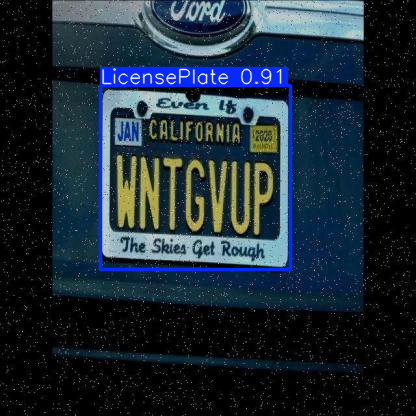

In [ ]:
result=model('/content/Tablice-5/test/images/006ac91c-3d2a-4985-9fae-ed3f545f994f_jpg.rf.bb6627a172d96b6aadb6b4eba931e619.jpg')
result[0].show()


image 1/1 /content/Tablice-5/test/images/0e2db93c-887f-46ce-a7f5-e15d3ae3f1f1_jpg.rf.cb2c19a4be80237a8a2cea52e3083d3a.jpg: 640x640 1 LicensePlate, 24.2ms
Speed: 5.0ms preprocess, 24.2ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


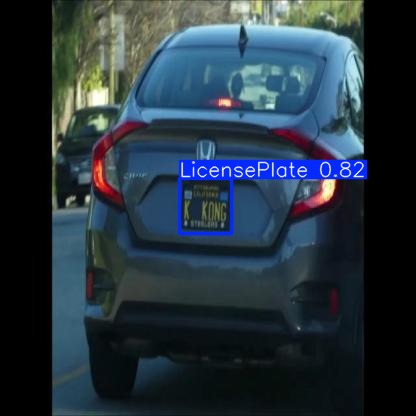

In [ ]:
result=model('/content/Tablice-5/test/images/0e2db93c-887f-46ce-a7f5-e15d3ae3f1f1_jpg.rf.cb2c19a4be80237a8a2cea52e3083d3a.jpg')
result[0].show()


image 1/1 /content/Tablice-5/test/images/34l5ua6ptufa1_jpg.rf.40e0fc2117884f9243bfdc7eb348a170.jpg: 640x640 1 LicensePlate, 26.9ms
Speed: 7.9ms preprocess, 26.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


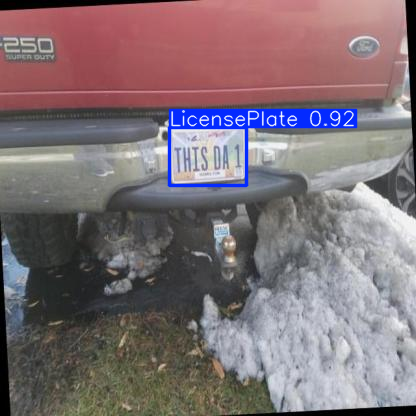

In [ ]:
result=model('/content/Tablice-5/test/images/34l5ua6ptufa1_jpg.rf.40e0fc2117884f9243bfdc7eb348a170.jpg')
result[0].show()

# Test our model on random google images


image 1/1 /content/car image.pg.jpg: 448x640 2 LicensePlates, 76.5ms
Speed: 2.6ms preprocess, 76.5ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


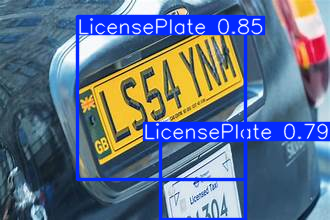

In [ ]:
model=YOLO('/content/runs/detect/train/weights/best.pt') # that is waight of our train model
result=model('/content/car image.pg.jpg') # Random google image
result[0].show()


image 1/1 /content/car2.png: 512x640 1 LicensePlate, 19.9ms
Speed: 4.9ms preprocess, 19.9ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


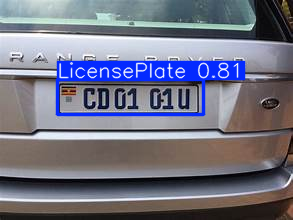

In [ ]:
result=model('/content/car2.png')
result[0].show()


image 1/1 /content/car6.png: 448x640 1 LicensePlate, 43.5ms
Speed: 5.0ms preprocess, 43.5ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


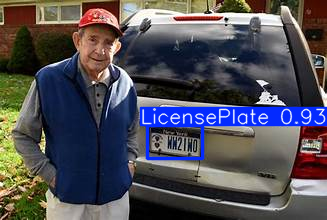

In [ ]:
result=model('/content/car6.png')
result[0].show()


image 1/1 /content/cars.png: 384x640 1 LicensePlate, 82.0ms
Speed: 16.3ms preprocess, 82.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


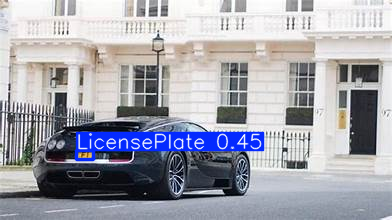

In [ ]:
result=model('/content/cars.png')
result[0].show()